In [1]:
# https://drive.google.com/file/d/10YffBX1Iy9_C4WMto7v8v-P8c6IX9sRD/view?usp=sharing
!gdown "10YffBX1Iy9_C4WMto7v8v-P8c6IX9sRD&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=10YffBX1Iy9_C4WMto7v8v-P8c6IX9sRD&confirm=t
To: /content/latestdata.csv
100% 522M/522M [00:04<00:00, 120MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/content/latestdata.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


# Описание данных
https://www.nature.com/articles/s41597-020-0448-0

- ID - id заболевшего
- age - возраст
- sex - пол
- city – город
- province – провинция, где сообщено о случае заражения
- country - страна, где сообщено о заражении
- latitude - широта, где сообщено о случае
- longitude - долгота, где сообщено о случае

- geo_resolution - место координат

- date_onset_symptoms - Дата, когда зарегистрированный случай стал симптоматическим. Конкретные даты указываются в формате ДД.ММ.ГГГГ. Диапазоны записываются в формате ДД.ММ.ГГГГ - ДД.ММ.ГГГГ. Диапазоны с неопределенными датами начала или окончания записываются как - ДД.ММ.ГГГГ и ДД.ММ.ГГГГ - соответственно.

- date_admission_hospital - Дата госпитализации зарегистрированного случая. Конкретные даты указываются в формате ДД.ММ.ГГГГ. Диапазоны записываются в формате ДД.ММ.ГГГГ - ДД.ММ.ГГГГ. Диапазоны с неопределенными датами начала или окончания записываются как - ДД.ММ.ГГГГ и ДД.ММ.ГГГГ

- date_confirmation - Дата, когда зарегистрированный случай был подтвержден как наличие COVID-19 с помощью RT-PCR. Точность подтверждения зависит от используемого источника данных. Конкретные даты указываются в формате ДД.ММ.ГГГГ. Диапазоны записываются в формате ДД.ММ.ГГГГ - ДД.ММ.ГГГГ. Диапазоны с неопределенными датами начала и окончания записываются как - ДД.ММ.ГГГГ и ДД.ММ.ГГГГ

- symptoms - список симптомов

- lives_in_Wuhan - yes - житель Ухани, no - нет

- travel_history_dates - Записаны даты поездок в Ухань и обратно. Конкретные даты указываются как ДД.ММ.ГГГГ и указывают дату, когда данное лицо покинуло Ухань. Диапазоны записываются как ДД.ММ.ГГГГ - ДД.ММ.ГГГГ, если доступны оба диапазона. Диапазоны с неопределенными датами начала и окончания записываются как - ДД.ММ.ГГГГ и ДД.ММ.ГГГГ - соответственно.

- travel_history_location - путешествия

- reported_market_exposure - поле, в котором указывается "да", если в отчете есть информация о рыночном риске, и "нет", если нет. N/A означает, что информация не предоставляется.

- additional_information - любая доп инофрмация

- chronic_disease_binary - наличие хронических заболевания

- chronic_disease - хронические заболевания

- source - URL-адрес, идентифицирующий источник этой информации

- sequence_available - геномная последовательность

- outcome - умер или выписан

- date_death_or_discharge - дата смерти или выписки

- location – Местонахождение зарегистрированного случая

- admin3 – Administrative unit level 3 (e.g., zip code) of where the case was reported.

- admin2 – Administrative unit level 2 (e.g., county) of where the case was reported.

- admin1 – Administrative unit level 1 (e.g., province) of where the case was reported.

- country_new – Administrative unit level 0 (e.g., country) of where the case was reported.

- admin_id – Administrative unit ID of the lowest level available for the case reported.

In [4]:
# посмотрим на общую информацию о полях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [5]:
# посмотрим на процент пропусков
df.isna().mean().sort_values()

ID                          0.000000
chronic_disease_binary      0.000000
admin_id                    0.000026
geo_resolution              0.000026
latitude                    0.000026
longitude                   0.000026
country                     0.000043
country_new                 0.011419
travel_history_binary       0.024504
date_confirmation           0.040537
province                    0.169137
source                      0.211845
data_moderator_initials     0.348737
city                        0.365309
admin1                      0.530115
admin2                      0.691346
sex                         0.783225
age                         0.784024
outcome                     0.885147
date_onset_symptoms         0.902254
date_admission_hospital     0.956578
admin3                      0.969946
additional_information      0.982866
location                    0.995002
travel_history_location     0.996554
lives_in_Wuhan              0.998379
date_death_or_discharge     0.998824
t

In [6]:
# наличие дубликатов
df.duplicated().sum()

0

In [7]:
# общее число уникальных пациентов совпадает с общим
df['ID'].nunique()

2676311

# Оставляем нужные поля
Для начала я бы избавился от части данных, которые по моему мнению, неинформативны. Начнем по порядку, где больше всего пропусков.

In [8]:
df['sequence_available'].unique()

array([nan, 'yes, BetaCoV/Mexico/CDMX/InDRE_01/2020', 'yes', '28.02.2020',
       '02.03.2020', '10.03.2020'], dtype=object)

In [9]:
(1 - 0.999996) * 2676311

10.705244000010707

Данный столбец, как я понял, отвечает за определнеи генома. Доступно всего у 11 пациентов, столбец неинформативен

In [10]:
df['chronic_disease'].unique()[1]

'Iran; Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia'

**NB** 

Так как уникальных записей много, я буду выводить одну запись для удобства. Сам я конечно же отсматриваю содержимое.

Данный столбец указывает на хронические заболевания, однако для анализа достаточно указать на наличие или отсутствие заболеваний. Такой столбец есть, поэтому пока это поле удаляем.

In [11]:
df['notes_for_discussion'].unique()[1]

'https://www.google.com/maps/place/Zhenlai+County,+Baicheng,+Jilin,+China/@45.9549881,122.8772653,9z/data=!3m1!4b1!4m5!3m4!1s0x5e6a4c6a8ea66823:0xfb96317ca7cfd392!8m2!3d45.847435!4d123.1998901'

Поле с дополнительными сведениями о пациенте. Тоже не самый информативный столбец в данном случае, пока убирается.

In [12]:
df['reported_market_exposure'].unique()

array([nan, 'no', 'na', 'yes',
       'yes, retailer in the seafood wholesale market',
       'contact with a positive case'], dtype=object)

Интересное поле, которое, как я понял, информирует о том, являлся ли пациент челоком, который контактировал с большим числом людей. Я бы пока оставил, чтобы посмотреть, где эти люди находилиись

In [13]:
df['symptoms'].unique()[1]

'fever, severe pneumonia'

Тоже инетересное поле. Его было бы неплохо переделать по категориям тяжести симптомов, чтобы посмотреть связь со смертностью. Оставляем, возможно, как то смогу преобразовать поле

In [14]:
df['travel_history_dates'].unique()[1]

nan

Интересное поле, но я бы представил его в виде бинарной последовательности, где 1 - был в Ухани, 0 - не был. Поэтому столбец заменю.

In [15]:
df['date_death_or_discharge'].unique()[1]

'22.02.2020'

Данных мало, но столбец нужный. Он позволяет понять среднюю продолжительность болезни у тех, кто вылечился.

In [16]:
df['lives_in_Wuhan'].unique()

array([nan, 'no', 'yes'], dtype=object)

Тоже полезный столбец. Но возможно его стоит объединить с теми, кто путешествовал в Ухани.

In [17]:
df['travel_history_location'].unique()[1]

nan

Тоже интересный столбец, сотавляем. Возможно, его также стоит перевести в бинарный вид.

In [18]:
df.query('location == location')[['city', 'province', 'location']].query('location != city')

,city,province,location
1,Vo Euganeo,Veneto,Vo' Euganeo
52,"Pixel Park, Economic Development Zone, Jinkai ...",Jilin,"Pixel Park, Jinkai District"
54,"Pixel Park, Economic Development Zone, Jinkai ...",Jilin,"Pixel Park, Jinkai District"
57,"Dashun Community, Dongling South Street, Nangu...",Jilin,"Dashun Community, Dongling South Street"
60,"Aegean Bay, Oriental Plaza, Economic Developme...",Jilin,"Aegean Bay, Oriental Plaza"
...,...,...,...
624433,"Kirkland, Snohomish County",Washington,Kirkland
625544,"Kirkland, Snohomish County",Washington,Kirkland
626655,"Kirkland, Snohomish County",Washington,Kirkland
627767,"Kirkland, Snohomish County",Washington,Kirkland


In [19]:
# посмотрим на пропуски в городах, где есть локация
df.query('location == location')[['city', 'province', 'location']].query('city != city')

,city,province,location


Видим, что столбец дублируется с городом. Также при пропуске города поле `location` не поможет заполнить пропуск. Поэтому удаляем.

In [20]:
df['additional_information'].unique()

array(['Case 55; mainland China travel via the Lok Ma Chau border crossing',
       'Hospitalized on 12.02.2020 for other reasons',
       'Case 65; family member of Case 50, a DBS employee, as is Case 55',
       ...,
       'Had been on a trip to Morocco returning via Venice airport on 29 Feb.',
       'Travelled to Italy',
       '17 infected abroad, 14 from community transmission'], dtype=object)

Удаляем столбец, неинформативен.

In [21]:
df.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary'],
      dtype='object')

In [22]:
# разберемся с полями admin
df[['city', 'province', 'country', 'admin3', 'admin2', 'admin1', 'admin_id']]

,city,province,country,admin3,admin2,admin1,admin_id
0,Shek Lei,Hong Kong,China,NaN,NaN,Hong Kong,8029.0
1,Vo Euganeo,Veneto,Italy,NaN,NaN,Veneto,8954.0
2,NaN,NaN,Singapore,NaN,NaN,NaN,200.0
3,Zhengzhou City,Henan,China,NaN,Zhengzhou City,Henan,10091.0
4,Pingxiang City,Jiangxi,China,NaN,Pingxiang City,Jiangxi,7060.0
...,...,...,...,...,...,...,...
2676306,Calleria,Coronel Portillo,Peru,NaN,NaN,NaN,14429.0
2676307,Pueblo Libre,Lima,Peru,NaN,NaN,NaN,14695.0
2676308,Comas,Lima,Peru,NaN,NaN,NaN,14400.0
2676309,Callao,Callao,Peru,NaN,NaN,NaN,14516.0


Заметим, что админ1, 2 и 3 это уровни администраций, то есть город, провинция и тд. Посмотрим, помогут ли эти данные в заполнении пропусков в городах или в провинциях (странах). Для этого оставим пустые города, где есть инфа об админах

In [23]:
df[['city', 'province', 'country', 'admin3', 'admin2', 'admin1', 'admin_id']] \
    .query('(city != city and province !=province and country != country) and (admin1 == admin1 or admin2 == admin1 or admin3 == admin3)')

,city,province,country,admin3,admin2,admin1,admin_id


Таких столбцов нет, поэтому удаляем поля с админами

# Промежуточные итоги
Чтобы не запутаться, сократим первоначальную таблицу. В дальнейшем будем работать с обновленной.

In [24]:
df_up = df.drop(['sequence_available', 'chronic_disease', 'notes_for_discussion', 'location', 'additional_information', 'admin3', 'admin2', 'admin1', 'admin_id'], axis=1)

In [25]:
df_up.isna().mean().sort_values()

ID                          0.000000
chronic_disease_binary      0.000000
geo_resolution              0.000026
longitude                   0.000026
latitude                    0.000026
country                     0.000043
country_new                 0.011419
travel_history_binary       0.024504
date_confirmation           0.040537
province                    0.169137
source                      0.211845
data_moderator_initials     0.348737
city                        0.365309
sex                         0.783225
age                         0.784024
outcome                     0.885147
date_onset_symptoms         0.902254
date_admission_hospital     0.956578
travel_history_location     0.996554
lives_in_Wuhan              0.998379
date_death_or_discharge     0.998824
travel_history_dates        0.999024
symptoms                    0.999233
reported_market_exposure    0.999601
dtype: float64

# вторая итерация
Поля `date_admission_hospital`, `date_onset_symptoms`, `outcome` - даты госпитализации, симптомов и результат госпитализации очень важны. Пропусков в них много, но данных много, поэтому некое представление о генеральной совокупности можно будет понять.

Поля пол, возраст и город также важны. Рассмотрим оставшиеся.

In [26]:
df['data_moderator_initials'].unique()

array([nan, '-', 'TR', 'SL', 'NRF, DSC', 'DSC', 'FS', 'FS,PA', 'NRF',
       'FS, PA', 'fS', 'fs', 'ZW'], dtype=object)

Поле с инициалами того, кто заполнял данные. Вряд ли поможет, так как заполнять данные мог кто угодно. Но проверим, как инициалы связаны с городами, странами

In [27]:
df[['city', 'country', 'data_moderator_initials']].query('data_moderator_initials == data_moderator_initials and (city != city and country != country)')

,city,country,data_moderator_initials


Выкидываем поле. Рассмотрим следующее поле - `country_new`

In [28]:
df[['country', 'country_new']].query('country != country_new and country != country').sort_values('country_new')

,country,country_new
1176,NaN,NaN
1182,NaN,NaN
1183,NaN,NaN
1892,NaN,NaN
1893,NaN,NaN
...,...,...
661674,NaN,NaN
661675,NaN,NaN
661676,NaN,NaN
661678,NaN,NaN


Столбец также неинформативен, удаляем. Смотрим дальше.

In [29]:
df['geo_resolution'].unique()

array(['point', 'admin0', 'admin2', 'admin3', 'admin1', nan, 'JPCP'],
      dtype=object)

Также удаляем

In [30]:
df_up = df_up.drop(['data_moderator_initials', 'country_new', 'geo_resolution'], axis=1)

In [31]:
df_up.isna().mean().sort_values()

ID                          0.000000
chronic_disease_binary      0.000000
longitude                   0.000026
latitude                    0.000026
country                     0.000043
travel_history_binary       0.024504
date_confirmation           0.040537
province                    0.169137
source                      0.211845
city                        0.365309
sex                         0.783225
age                         0.784024
outcome                     0.885147
date_onset_symptoms         0.902254
date_admission_hospital     0.956578
travel_history_location     0.996554
lives_in_Wuhan              0.998379
date_death_or_discharge     0.998824
travel_history_dates        0.999024
symptoms                    0.999233
reported_market_exposure    0.999601
dtype: float64

In [32]:
df_up['source'].unique()

array(['https://www.scmp.com/news/hong-kong/health-environment/article/3050681/coronavirus-hong-kong-confirms-three-news-cases',
       'https://www.corriere.it/cronache/20_febbraio_21/coronavirus-italia-cosa-sappiamo-casi-codogno-lombardia-27fa736c-548b-11ea-9196-da7d305401b7.shtml',
       'https://www.channelnewsasia.com/news/singapore/coronavirus-covid-19-singapore-cases-grace-assembly-of-god--12434646\nhttps://bnonews.com/wp-content/uploads/2020/02/2172020Cases.pdf',
       ...,
       'https://www.health-ni.gov.uk/publications/daily-dashboard-updates-covid-19-may-2090',
       'https://www.health-ni.gov.uk/publications/daily-dashboard-updates-covid-19-may-2106',
       'https://www.health-ni.gov.uk/publications/daily-dashboard-updates-covid-19-may-2118'],
      dtype=object)

Также бесполезное поле для задачи

На самом деле поле `province` также не несет много информации. Рассмотрим случаи, когда не указан город и указана провинция. В случае, есть таких случаев нет - удаляем.

In [33]:
df_up[['city', 'province']].query('province == province and city != city')

,city,province
485,NaN,Ningxia
486,NaN,Ningxia
490,NaN,Ningxia
492,NaN,Ningxia
493,NaN,Ningxia
...,...,...
2495999,NaN,CABA
2496000,NaN,CABA
2496002,NaN,CABA
2496005,NaN,CABA


Значений много, так как пропусков в провинциях меньше, чем в городах. Проделаем обратную операцию.

In [34]:
df_up[['city', 'province']].query('province != province and city == city')

,city,province
335,Mei Hwan Drive,NaN
557,Fernvale Road,NaN
668,Woodlands Crescent,NaN
779,Lorong 8 Toa Payoh,NaN
890,Mei Ling Street,NaN
...,...,...
616633,Buenos Aires,NaN
616644,Buenos Aires,NaN
631923,San Juan,NaN
631934,San Juan,NaN


In [35]:
# рассмотрим более детально
df_up[['city', 'province']].query('province != province and city == city')['city'].nunique()

203

Очень много городов. Заполнить пропуски в провинциях будет проблематично. Оставим оба поля.

In [36]:
df_up = df_up.drop(['source'], axis=1)

In [37]:
df_up.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'date_onset_symptoms', 'date_admission_hospital',
       'date_confirmation', 'symptoms', 'lives_in_Wuhan',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'outcome',
       'date_death_or_discharge', 'travel_history_binary'],
      dtype='object')

# Работа с предварительно очищенными данными
Выше упоминалось, что есть поля, которые можно объединить. Например, поля `lives_in_Wuhan` и `travel_history_dates` отвечают за то, живет или был ли человек в Ухани. 

In [38]:
df_up['travel_history_location'].nunique() # было 772 разных точки туризма

772

In [39]:
df_up['travel_history_location'].value_counts().head(11) # топ 10 посещаемых локаций пациентами (USA + United States вместе)

USA                  1234
Spain                1119
Wuhan City, Hubei     729
Italy                 683
France                336
Iran                  321
Dubai                 284
United States         264
United Kingdom        215
Austria               203
Germany               157
Name: travel_history_location, dtype: int64

In [40]:
df_up[['travel_history_dates', 'travel_history_location']] \
        .query('travel_history_location == travel_history_location and travel_history_dates == travel_history_dates')

,travel_history_dates,travel_history_location
0,22.01.2020,China
31,16.01.2020 - 23.02.2020,Thailand
32,28.01.2020 - 29.01.2020,Vietnam
39,22.01.2020 - 23.01.2020,"Beijing, Beijing, China"
40,21.01.2020 - 23.01.2020,"Shenyang City, Liaoning; Tonghua City, Jilin"
...,...,...
672418,15.01.2020,"Wuhan City, Hubei, China"
672421,02.03.2020,"Indiana, United States"
672428,23.02.2020,Iran
673596,- 05.02.2020,"Wuhan City, Hubei, China"


In [41]:
# рассмотрим, где были зарегистрированы жители Уханя как пациенты
print(df_up['lives_in_Wuhan'].unique())
df_up[['lives_in_Wuhan', 'city']].query('lives_in_Wuhan == "yes"') # 554 человека

[nan 'no' 'yes']


,lives_in_Wuhan,city
494,yes,Bamrasnaradura Hospital
601,yes,NaN
756,yes,Haneda Airport
795,yes,NaN
804,yes,Kunming City
...,...,...
455549,yes,Qianxinan Prefecture
456015,yes,Wanning City
626322,yes,Vancouver
626433,yes,Vancouver


возможно стоит удалить поле `lives_in_Wuhan`. Рассмотрим случаи, когда жители Ухани потушествуют. Возможно это побочная таблица путешественников


In [42]:
df_up[['province', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'travel_history_binary']] \
        .query('lives_in_Wuhan == "yes"')

,province,lives_in_Wuhan,travel_history_dates,travel_history_location,travel_history_binary
494,Nonthaburi,yes,NaN,NaN,NaN
601,Shanghai,yes,NaN,Wuhan,NaN
756,Tokyo,yes,07.02.2020,Wuhan,NaN
795,Yunnan,yes,23.01.2020 - 05.02.2020,"Guiyang City, Guizhou; Wuhan City, Hubei; Zhao...",NaN
804,Yunnan,yes,25.01.2020,"Shilin Yi County, Kunming City, Yunnan; Chuxio...",NaN
...,...,...,...,...,...
455549,Guizhou,yes,22.01.2020,"Guizhou, China",True
456015,Hainan,yes,18.01.2020,"Wuhan City, Hubei",True
626322,British Columbia,yes,NaN,"Hubei, China",False
626433,British Columbia,yes,NaN,"Hubei, China",False


In [43]:
df_up[['province', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'travel_history_binary']] \
        .query('lives_in_Wuhan == "no"')

,province,lives_in_Wuhan,travel_history_dates,travel_history_location,travel_history_binary
163,Kanagawa Prefecture,no,NaN,NaN,NaN
335,NaN,no,NaN,NaN,NaN
446,NaN,no,NaN,NaN,NaN
777,Wakayama Prefecture,no,NaN,NaN,NaN
1062,Selangor,no,01.02.2020,"Macau, China",NaN
...,...,...,...,...,...
645513,Arizona,no,NaN,"Wuhan City, Hubei, China",False
653421,Tennessee,no,NaN,NaN,False
658602,Illinois,no,NaN,NaN,False
672418,Washington,no,15.01.2020,"Wuhan City, Hubei, China",False


Возникает достаточно странная ситуация из-за наличия поля `lives_in_Wuhan`. Есть объекты, где в статусе жителя Уханя указывается `yes`, при этом он оказывается в другом городе, но в статусе `travel_history_binary` у него пустое значение. Рассмотрим подробнее **travel_history_binary** и **travel_history_location** с **travel_history_dates**

In [44]:
df_up[['city', 'travel_history_dates', 'travel_history_location', 'travel_history_binary']]. \
        query('(travel_history_binary == False or travel_history_binary != travel_history_binary) and (travel_history_location == travel_history_location or travel_history_dates == travel_history_dates)')

,city,travel_history_dates,travel_history_location,travel_history_binary
0,Shek Lei,22.01.2020,China,NaN
27,"Zhenlai County, Baicheng City",NaN,"Harbin City, Heilongjiang",NaN
31,Changchun City,16.01.2020 - 23.02.2020,Thailand,NaN
32,Changchun City,28.01.2020 - 29.01.2020,Vietnam,NaN
39,Tonghua City,22.01.2020 - 23.01.2020,"Beijing, Beijing, China",NaN
...,...,...,...,...
2500739,Bogota DC,NaN,Egypt,False
2500747,Bogota DC,NaN,USA,False
2500771,Bogota DC,NaN,Spain,False
2500798,Bogota DC,NaN,USA,False


In [45]:
# рассмотрим обратный случай - в путешествиях True, а в других полях пусто
df_up[['city', 'travel_history_dates', 'travel_history_location', 'travel_history_binary']]. \
        query('(travel_history_binary == True) and (travel_history_location != travel_history_location and travel_history_dates != travel_history_dates)')

,city,travel_history_dates,travel_history_location,travel_history_binary
65579,NaN,NaN,NaN,True
66136,NaN,NaN,NaN,True
66247,NaN,NaN,NaN,True
66358,NaN,NaN,NaN,True
66469,NaN,NaN,NaN,True
...,...,...,...,...
672559,Leon County,NaN,NaN,True
672560,Leon County,NaN,NaN,True
672561,Leon County,NaN,NaN,True
673206,Fort Bend County,NaN,NaN,True


## Возможные варианты, почему в travel_history_binary такие странные значения
1. Ошибки в данных
2. Статусы в поле означают что-то другое
3. Возможно при статусе True просто учитывалось, ездил ли заболевший куда либо, но поле, куда именно и когда, отсутствует
4. Возможно, все 26к человек были в Ухани или Китае, это надо проверить. В таком случае в качестве в поле `country` не должно быть Китая или Уханя.

In [46]:
# мне интересна 4 версия, так в первоисточниках такой колонки нет, но есть другая колонка, которая обозначает, был ли человек в Ухани
len(df_up[['city']].query('city == "Wuhan City"'))

13664

In [47]:
df_up[['province', 'city', 'country', 'travel_history_dates', 'travel_history_location', 'travel_history_binary']]. \
        query('(travel_history_binary == True) and (travel_history_location != travel_history_location and travel_history_dates != travel_history_dates) and city == "Wuhan City"')

,province,city,country,travel_history_dates,travel_history_location,travel_history_binary


Ни одного человека, у которого статус **True** в `travel_history_binary`, не попал в больницу в Ухани. Мне кажется, данное поле как раз отвечает за то, был ли человек там или нет, попав в больницу в другом городе.

В таком случае можно объединить 2 столбца: `travel_history_binary` и `lives_in_Wuhan`. Полученный столбец будет отвечать за то, имеет ли отношение человек к Ухани.

In [48]:
df_up.head(2)

,ID,age,sex,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,outcome,date_death_or_discharge,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,NaN,NaN,14.02.2020,NaN,NaN,22.01.2020,China,NaN,False,"critical condition, intubated as of 14.02.2020",NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,False,death,22.02.2020,NaN


In [49]:
print(df_up['lives_in_Wuhan'].unique())
df_up['travel_history_binary'].unique()

[nan 'no' 'yes']


array([nan, True, False], dtype=object)

In [50]:
def value(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1
    else:
        return -100 # на случай нанов
    return x

In [51]:
# перепишем yes и no в бинарном виде
df_up['col1'] = df_up['lives_in_Wuhan'].apply(lambda x: value(x))
df_up['col1'].value_counts()

-100    2671973
 0         3784
 1          554
Name: col1, dtype: int64

In [52]:
df_up['lives_in_Wuhan'].value_counts(dropna=False) # проверим, что все сошлось

NaN    2671973
no        3784
yes        554
Name: lives_in_Wuhan, dtype: int64

In [53]:
def nan(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    else:
        return -100
    return x

In [54]:
df_up['col2'] = df_up['travel_history_binary'].apply(lambda x: nan(x))

In [55]:
df_up['col2'].value_counts(dropna=False)

 0      2579528
-100      65579
 1        31204
Name: col2, dtype: int64

In [56]:
df_up['travel_history_binary'].value_counts(dropna=False) # проверим, что все сошлось

False    2579528
NaN        65579
True       31204
Name: travel_history_binary, dtype: int64

In [57]:
# сложим значения полей lives_in_Wuhan и travel_history_binary
df_up['sum'] = df_up['col2'] + df_up['col1']
df_up['sum'].value_counts(dropna=False)

-100    2578083
-200      64274
-99       30921
 0         2450
 1          329
 2          254
Name: sum, dtype: int64

In [58]:
def lives(x):
    if x > 0 or x == -99:
        return 'yes'
    elif x == -200:
        return 'unknown'
    elif x == -100 or  x == 0:
        return 'no'
    return x

In [59]:
df_up['was_in_Wuhan'] = df_up['sum'].apply(lambda x: lives(x))

In [60]:
# проверим, что все работает
df_up['was_in_Wuhan'].value_counts(dropna=False)

no         2580533
unknown      64274
yes          31504
Name: was_in_Wuhan, dtype: int64

In [61]:
30921 + 329 + 254

31504

In [62]:
df_up_2 = df_up.drop(['sum', 'travel_history_binary', 'col2', 'col1', 'lives_in_Wuhan'], axis=1)

In [63]:
df_up_2.head(2)

,ID,age,sex,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,reported_market_exposure,chronic_disease_binary,outcome,date_death_or_discharge,was_in_Wuhan
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,NaN,NaN,14.02.2020,NaN,22.01.2020,China,NaN,False,"critical condition, intubated as of 14.02.2020",NaN,unknown
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,False,death,22.02.2020,unknown


In [64]:
df_up_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   date_onset_symptoms       object 
 9   date_admission_hospital   object 
 10  date_confirmation         object 
 11  symptoms                  object 
 12  travel_history_dates      object 
 13  travel_history_location   object 
 14  reported_market_exposure  object 
 15  chronic_disease_binary    bool   
 16  outcome                   object 
 17  date_death_or_discharge   object 
 18  was_in_Wuhan              object 
dtypes: bool(1), float64(2), object(16)
memory usage: 370.1+ MB


In [65]:
df_up_2.isna().mean().sort_values()

ID                          0.000000
chronic_disease_binary      0.000000
was_in_Wuhan                0.000000
latitude                    0.000026
longitude                   0.000026
country                     0.000043
date_confirmation           0.040537
province                    0.169137
city                        0.365309
sex                         0.783225
age                         0.784024
outcome                     0.885147
date_onset_symptoms         0.902254
date_admission_hospital     0.956578
travel_history_location     0.996554
date_death_or_discharge     0.998824
travel_history_dates        0.999024
symptoms                    0.999233
reported_market_exposure    0.999601
dtype: float64

# Анализ других переменных
Посмотрим, нет ли ошибок в поле. Также посмотрим, какой возраст у пациентов

In [66]:
df_up_2['sex'].unique() # все нормально

array(['male', 'female', nan], dtype=object)

In [67]:
df_up_2['age'].unique()

array([nan, '78', '61', '66', '27', '17', '51', '68', '26', '30', '53',
       '35', '28', '58', '33', '50', '45', '24', '88', '29', '21', '52',
       '60', '56', '79', '40-49', '82', '25', '40', '20-29', '40-89',
       '60-69', '80-89', '50-59', '13-19', '30-39', '43', '7', '44', '69',
       '16', '47', '8', '10', '55', '38', '42', '34', '62', '39', '71',
       '64', '36', '31', '1', '48', '54', '70-79', '60-60', '65', '46',
       '57', '32', '37', '80-80', '73', '67', '0-6', '0-10', '22', '41',
       '10-19', '70', '96', '20', '63', '19', '1.75', '75', '18-65',
       '0.6666666667', '12', '49', '80', '77', '18', '72', '4', '15',
       '95', '0-18', '23', '65-99', '81', '90-99', '50-69', '85', '91',
       '87', '14', '19-65', '70-70', '60-70', '76', '94', '38-68', '0.5',
       '0.25', '9', '16-17', '5-59', '40-50', '13', '60-', '59', '12-19',
       '74', '18-50', '18-49', '41-60', '61-80', '18-60', '60-99',
       '40-69', '30-69', '40-45', '0-9', '11', '54-56', '0-19', '5'

в поле представлены как диапазоны возраста, так и месяцы недели (дети), так и числа. При чем есть возраст за 100 лет (в т.ч. 121 год). При этом есть довольно странные диапазоны с разницей в 70 лет (скорее всего это странные сегменты). Приведем данные примерно в общий вид.

Нужно избавиться от:
- слов (месяцы, недели)
- изабвится от `-` и других лишних знаков
- с учетом такого странного разброса я посчитаю среднее, где дан диапазон, а потом все равно разобью возраст на диапазоны, но более логичные с точки зрения возрастной периодизации

In [68]:
# избавляемся от слов
def not_month(x):
    if 'month' in x or 'week' in x:
        return '0-2'
    return x

In [69]:
df_up_2['age'] = df_up_2['age'].astype('str').apply(lambda x: not_month(x))

In [70]:
# избавляемся от знаков и пробелов
df_up_2['age_new'] = df_up_2['age'].str.replace('+', '').str.replace('-', ' ').str.replace('   ', ' ').str.strip()

<ipython-input-70-90de243ab8b4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_up_2['age_new'] = df_up_2['age'].str.replace('+', '').str.replace('-', ' ').str.replace('   ', ' ').str.strip()


In [71]:
# все оборачиваем в списки
df_up_2['age_new'] = df_up_2['age_new'].str.split(' ')

In [72]:
df_up_2['age_new'].head(5)

0    [nan]
1     [78]
2     [61]
3    [nan]
4    [nan]
Name: age_new, dtype: object

In [73]:
def sum(x):
    '''
    если на вход подается лист из двух элементов, то берется среднее
    если длина списка 1, то возвращается 1й элемент
    '''
    if x == x:

        if len(x) == 2:
            return round((int(x[0]) + int(x[1])) / 2, 2)
        if len(x) == 1:
            return x[0]
    return x

In [74]:
df_up_2['age_new'] = df_up_2['age_new'].apply(lambda x: sum(x))

In [75]:
df_up_2['age_new'] = df_up_2['age_new'].astype('float32')

<AxesSubplot:>

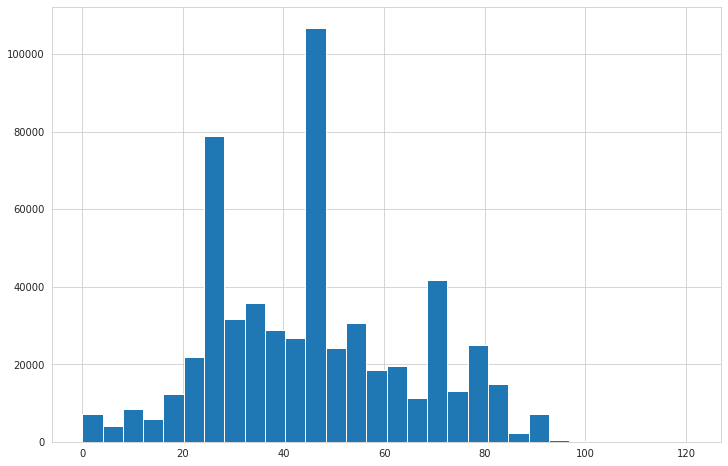

In [76]:
plt.figure(figsize=(12, 8))
df_up_2['age_new'].hist(bins=30)

In [77]:
len(df_up_2.query('age_new > 100'))

37

In [78]:
df_up_2.query('age_new > 100')['country'].value_counts()

Peru                 19
Argentina             7
Mexico                3
Philippines           2
Colombia              2
Equatorial Guinea     1
Cuba                  1
United States         1
Czech Republic        1
Name: country, dtype: int64

In [79]:
len(df_up_2.query('country == "Peru"'))

181244

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_new'>

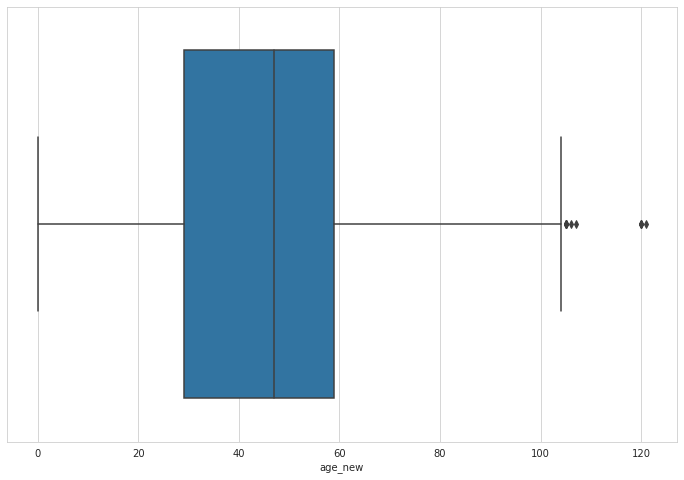

In [80]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_up_2['age_new'])

In [81]:
df_up_2['age_new'].describe()

count    578018.000000
mean         45.641304
std          19.824852
min           0.000000
25%          29.000000
50%          47.000000
75%          59.000000
max         121.000000
Name: age_new, dtype: float64

Есть сомнения по поводу возраста за 100 лет, особенно в Перу, но таких людей действительно немного, и они будут отнесены в группу 90+, т.е. долгожителей. Распределение похоже на нормальное, большие значения скорее всего результат усреднения диапазона, где разница составляла до 70 лет. Однако другого способа я не придумал.

Из интересного: достаточно много зараженных детей.

In [82]:
del df_up_2['age']

Разобьем возраст на возрастные группы:
1. 0-3 года - грудной период + детство
2. 3-11 лет - дошкольный возраст и младшие школьники
3. 12-18 лет - юношество
4. 18-35 лет - молодость
5. 35-55 лет - зрелый возраст
6. 55-75 лет - пожилой возраст
7. 75-90 лет - старчество
8. 90+ - долгожители

Можно воспользоваться функцией cut, однако для заданных групп я напишу функцию самостоятельно.

In [83]:
def age(x):
    if x < 4:
        return '0-3'
    elif x > 3 and x <= 12:
        return '4-12'
    elif x > 12 and x <= 18:
        return '12-18'
    elif x > 18 and x <= 35:
        return '18-35'
    elif x > 35 and x <= 55:
        return '35-55'
    elif x > 55 and x <= 75:
        return '55-75'
    elif x > 75 and x <= 90:
        return '75-90'
    elif x > 90:
        return '90+'
    return x

In [84]:
df_up_2['age_range'] = df_up_2['age_new'].apply(lambda x: age(x))

In [85]:
df_up_2['age_range'].value_counts()

35-55    219023
18-35    169168
55-75    107899
75-90     50453
4-12      13286
12-18     10408
0-3        6483
90+        1298
Name: age_range, dtype: int64

# Работа со временем
Достаточно много полей со временем. Рассмотрим и переведем каждое (если получится)
### date_death_or_discharge
В данном поле даты записаны как строки. Других лишних симовлов или свдоенной даты нет, поэтому колонку достаточно перевести в datetime. При этом строки записаны  в формате `день-месяц-год`. Это нетипичный формат, который надо будет исправить.

Также после начала перевода времени удалось обнаружить дату формата `месяц-день-год` (03.22.2020). Этот момент надо также учесть.

In [86]:
df_up_2['date_death_or_discharge'].unique()[1:5]

array(['22.02.2020', '17.02.2020', '20.02.2020', '02.03.2020'],
      dtype=object)

In [87]:
# где есть 03.22.2020, то формат будет месяц-день-год
df_up_2['date_death_or_discharge_new'] = np.where(df_up_2['date_death_or_discharge'].str.contains('03.22.2020'), 
                                                    pd.to_datetime(df_up_2['date_death_or_discharge']).dt.strftime('%m.%d.%Y'), 
                                                    pd.to_datetime(df_up_2['date_death_or_discharge']).dt.strftime('%d.%m.%Y')) 

In [88]:
# теперь переведем время в общий вид год-месяц-день
df_up_2['date_death_or_discharge_new'] = pd.to_datetime(df_up_2['date_death_or_discharge_new'])

In [89]:
df_up_2['date_death_or_discharge_new'].unique()[1:5] # все совпадает с изначальной датой

array(['2020-02-22T00:00:00.000000000', '2020-02-17T00:00:00.000000000',
       '2020-02-20T00:00:00.000000000', '2020-03-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [90]:
# данные охватывают первую половину 2020 года
print(df_up_2['date_death_or_discharge_new'].min())
print(df_up_2['date_death_or_discharge_new'].max())

2020-01-09 00:00:00
2020-06-08 00:00:00


In [91]:
# посмотрим, стоит ли вообще заморачиваться с другими датами
query = 'date_onset_symptoms == date_onset_symptoms and date_admission_hospital == date_admission_hospital and date_confirmation == date_confirmation and date_death_or_discharge == date_death_or_discharge'

In [92]:
len(df_up_2.query(query))

669

В целом 669 записей с полными датами достаточно для того, чтобы оценить примерные сроки того, как быстро человека положили в больницу после симптомов, как быстро подтвердился диагноз и сколько он лечился. Тем более наверняка есть много записей, где в 1 поле даты пропуск, а другие заполнены. В таком случае будет еще больше записей, а значит и оценка будет более репрезентативной.

### date_onset_symptoms

In [93]:
# в date_onset_symptoms есть даты, разделенные тире
df_up_2['date_onset_symptoms'].unique()[df_up_2['date_onset_symptoms'].unique() == '01.01.2020-12.01.2020']

array(['01.01.2020-12.01.2020'], dtype=object)

In [94]:
# формат даты также день месяц год
df_up_2['date_onset_symptoms'].unique()[1:5]

array(['08.02.2020', '01.02.2020', '30.01.2020', '14.02.2020'],
      dtype=object)

In [95]:
def date(x):
    '''
    если в листе 2 записи, то вернется первая. Если запись одна, то вернется она же
    '''
    if len(x.split('-')) == 1:
        return x
    elif len(x.split('-')) == 2:
        x = x.replace('-', ' ').replace('   ', ' ').split(' ')
        return x[0]
    return x

In [96]:
df_up_2['date_onset_symptoms_new'] = df_up_2['date_onset_symptoms'].astype('str').apply(lambda x: date(x))

In [97]:
# делаем аналогичную операцию. 2 колонка здесь нужна, потому что с 1 время не переводится в нормальный вид
df_up_2['date_onset_symptoms_new_2'] = pd.to_datetime(df_up_2['date_onset_symptoms_new']).dt.strftime('%d.%m.%Y')
df_up_2['date_onset_symptoms_new_2'] = pd.to_datetime(df_up_2['date_onset_symptoms_new_2'])

In [98]:
# проверим правильность перевода
df_up_2[['date_onset_symptoms_new_2', 'date_onset_symptoms']].query('date_onset_symptoms == date_onset_symptoms').head(3)

,date_onset_symptoms_new_2,date_onset_symptoms
53,2020-02-08,08.02.2020
55,2020-02-01,01.02.2020
335,2020-01-30,30.01.2020


In [99]:
print(df_up_2['date_onset_symptoms_new_2'].min())
print(df_up_2['date_onset_symptoms_new_2'].max())

2019-12-10 00:00:00
2020-11-26 00:00:00


In [100]:
# посмотрим, сколько дат после 1-ого полугодия
len(df_up_2[['date_onset_symptoms_new_2']].query('date_onset_symptoms_new_2 > "2020-06-08"'))

1

Скорее всего ошибки нет в том, что даты симпотом и даты выписки (смерти) отличаются на 5 месяцев. Возможно, у тех больных, у кого симптомы были после июня, нет даты выписки

In [101]:
df_up_2.query('date_onset_symptoms_new_2 > "2020-06-08" and date_death_or_discharge_new == date_death_or_discharge_new')['date_death_or_discharge_new']

57067   2020-01-21
Name: date_death_or_discharge_new, dtype: datetime64[ns]

Посмотрим на сырые данные, возможно ошибка при переводе:

In [102]:
df_up_2.query('date_onset_symptoms_new_2 > "2020-06-08" and date_death_or_discharge_new == date_death_or_discharge_new')

,ID,sex,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,...,reported_market_exposure,chronic_disease_binary,outcome,date_death_or_discharge,was_in_Wuhan,age_new,age_range,date_death_or_discharge_new,date_onset_symptoms_new,date_onset_symptoms_new_2
57067,000-2-230,female,Wuhan City,Hubei,China,30.62506,114.3421,26.11.2020,NaN,NaN,...,NaN,False,died,21.01.2020,unknown,85.0,75-90,2020-01-21,26.11.2020,2020-11-26


# Замечания
1. В сырых данных ошибка. После перевода всех дат проверим на логику все 4 поля, чтобы время шло последовательно. Ошибки при переводе быть не может
2. Город указан Ухань, при этом в созданной колонке was_in_Wuhan стоит статус неизвестно. Также надо будет исправить

In [103]:
del df_up_2['date_onset_symptoms_new'] # другие сырые даты еще пригодятся

In [104]:
df_up_2.columns

Index(['ID', 'sex', 'city', 'province', 'country', 'latitude', 'longitude',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'outcome',
       'date_death_or_discharge', 'was_in_Wuhan', 'age_new', 'age_range',
       'date_death_or_discharge_new', 'date_onset_symptoms_new_2'],
      dtype='object')

# Оставшиеся даты
- date_admission_hospital - дата госпитализации
- date_confirmation - дата подтверждения коронавируса

Начнем с даты госпитализации.

В поле также есть диапазон данных, резделенный дефисом, как в поле `date_onset_symptoms`. Сделаем те же операции.

In [105]:
df_up_2['date_admission_hospital'].unique()[df_up_2['date_admission_hospital'].unique() == '18.01.2020 - 23.01.2020']

array(['18.01.2020 - 23.01.2020'], dtype=object)

In [106]:
df_up_2['date_admission_hospital_new'] = df_up_2['date_admission_hospital'].astype('str').apply(lambda x: date(x))

In [107]:
# делаем аналогичную операцию. 
df_up_2['date_admission_hospital_new_2'] = pd.to_datetime(df_up_2['date_admission_hospital_new']).dt.strftime('%d.%m.%Y')
df_up_2['date_admission_hospital_new_2'] = pd.to_datetime(df_up_2['date_admission_hospital_new_2'])

In [108]:
# срвниваем полученные результаты с исходными - все сходится
df_up_2.query('date_admission_hospital == date_admission_hospital')[['date_admission_hospital', 'date_admission_hospital_new_2']].head(5)

,date_admission_hospital,date_admission_hospital_new_2
54,04.02.2020,2020-02-04
55,30.01.2020,2020-01-30
63,14.02.2020,2020-02-14
365,17.02.2020,2020-02-17
446,14.02.2020,2020-02-14


С датой постановки диагноза ситуация аналогичная - даты с дефисами

In [109]:
df_up_2['date_confirmation_new'] = df_up_2['date_confirmation'].astype('str').apply(lambda x: date(x))

In [110]:
# делаем аналогичную операцию. 
df_up_2['date_confirmation_new_2'] = pd.to_datetime(df_up_2['date_confirmation_new']).dt.strftime('%d.%m.%Y')
df_up_2['date_confirmation_new_2'] = pd.to_datetime(df_up_2['date_confirmation_new_2'])

In [111]:
# срвниваем полученные результаты с исходными - все сходится
df_up_2.query('date_confirmation_new == date_confirmation_new')[['date_confirmation_new', 'date_confirmation_new_2']].head(5)

,date_confirmation_new,date_confirmation_new_2
0,14.02.2020,2020-02-14
1,21.02.2020,2020-02-21
2,14.02.2020,2020-02-14
3,26.01.2020,2020-01-26
4,14.02.2020,2020-02-14


In [112]:
df_up_2 =  df_up_2.drop(['date_confirmation_new', 'date_admission_hospital_new'], axis=1)

Теперь необходимо проверить поле с датами на логические ошибки. Есть 4 поля, отсортируем их хронологическом порядке:
- `date_onset_symptoms_new_2` - дата первых симптомов
- `date_admission_hospital_new_2` - дата госпитализации
- `date_confirmation_new_2` - дата постановки диагноза
- `date_death_or_discharge_new` - дата выписки или смерти

В данном случае есть вероятность того, что дата госпитализации может быть позже даты постановки диагноза. Также человек мог умереть раньше, чем его диагноз бы потдвердился. При этом также есть вероятность того, что человек умрет без симптомов. Найдем те случаи, когда дата смерти идет раньше, чем дата симптомов.

Найдем объекты, согласно последнему условию

In [113]:
df_up_2.query('date_onset_symptoms_new_2 > date_death_or_discharge_new')

,ID,sex,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,...,chronic_disease_binary,outcome,date_death_or_discharge,was_in_Wuhan,age_new,age_range,date_death_or_discharge_new,date_onset_symptoms_new_2,date_admission_hospital_new_2,date_confirmation_new_2
57067,000-2-230,female,Wuhan City,Hubei,China,30.62506,114.3421,26.11.2020,NaN,NaN,...,False,died,21.01.2020,unknown,85.0,75-90,2020-01-21,2020-11-26,NaT,NaT
121042,002-100993,female,Manila,Metro Manila,Philippines,14.59580,120.9772,24.04.2020,NaN,06.05.2020,...,False,died,05.04.2020,no,77.0,75-90,2020-04-05,2020-04-24,NaT,2020-05-06
122421,002-102233,female,Silang,Cavite,Philippines,14.23056,120.9750,17.04.2020,NaN,11.05.2020,...,False,died,14.04.2020,no,74.0,55-75,2020-04-14,2020-04-17,NaT,2020-05-11


Нашлось 3 таких объекта. Довольно странно, что человек умирает раньше, чем у него проявляются симптомы. При этом даты перевелись корректно (сырые можно будет удалить). Скорее всего это ошибка в данных, я бы их убрал. Также удалим ненужную колонку `travel_history_dates`, которую забыли удалить при создании `was_in_Wuhan`

Следом рассмотрим случаи, когда `city` = Wuhan City и `was_in_Wuhan` = no или unknown

In [114]:
id_list = df_up_2.query('date_onset_symptoms_new_2 > date_death_or_discharge_new')['ID'].to_list()

In [115]:
df_up_2.columns

Index(['ID', 'sex', 'city', 'province', 'country', 'latitude', 'longitude',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'outcome',
       'date_death_or_discharge', 'was_in_Wuhan', 'age_new', 'age_range',
       'date_death_or_discharge_new', 'date_onset_symptoms_new_2',
       'date_admission_hospital_new_2', 'date_confirmation_new_2'],
      dtype='object')

In [116]:
df_up_dates = df_up_2.drop(['travel_history_dates',  'date_confirmation', 'date_admission_hospital', 'date_onset_symptoms', 'date_death_or_discharge'], axis=1)

In [117]:
df_up_dates.shape

(2676311, 19)

In [118]:
# удаляем 3 наблюдения выше
df_up_dates = df_up_dates.query('ID not in @id_list')
df_up_dates.shape

(2676308, 19)

In [119]:
# переименуем колонки
df_up_dates = df_up_dates.rename(columns={'age_new': 'age',
                                          'date_death_or_discharge_new': 'date_of_outcome',
                                          'date_onset_symptoms_new_2': 'date_of_symptoms',
                                          'date_admission_hospital_new_2': 'date_to_hospital',
                                          'date_confirmation_new_2': 'date_confirm'})

In [120]:
# рассмотрим случаи, когда city = Wuhan City и was_in_Wuhan = no или unknown
df_up_dates.query('city == "Wuhan City" and (was_in_Wuhan == "no" or was_in_Wuhan == "unknown")').head(3)

,ID,sex,city,province,country,latitude,longitude,symptoms,travel_history_location,reported_market_exposure,chronic_disease_binary,outcome,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm
44395,000-2-100,NaN,Wuhan City,Hubei,China,30.62506,114.3421,NaN,NaN,NaN,False,NaN,unknown,44.5,35-55,NaT,NaT,NaT,2020-01-18
44397,000-2-10000,NaN,Wuhan City,Hubei,China,30.62506,114.3421,NaN,NaN,NaN,False,NaN,unknown,NaN,NaN,NaT,NaT,NaT,2020-02-06
44398,000-2-10001,NaN,Wuhan City,Hubei,China,30.62506,114.3421,NaN,NaN,NaN,False,NaN,unknown,NaN,NaN,NaT,NaT,NaT,2020-02-06


In [121]:
# больше 13к человек
len(df_up_dates.query('city == "Wuhan City" and (was_in_Wuhan == "no" or was_in_Wuhan == "unknown")'))

13625

Так как файл достаточно большой, то можно дропнуть эти объекты, записать их в отдельный датафрейм и там провести все манипуляции

In [122]:
list_wuh = df_up_dates.query('city == "Wuhan City" and (was_in_Wuhan == "no" or was_in_Wuhan == "unknown")')['ID'].to_list()

In [123]:
# создаем отдельный датафрейм
df_wuh = df_up_dates.query('ID in @list_wuh')

In [124]:
len(df_wuh)

13625

In [125]:
# делаем копию, чтобы не было ошибок типа SettingWithCopyWarning
df_wuh = df_wuh.copy()

In [126]:
df_wuh['new_status'] = 'yes'

In [127]:
# убираем старую таблитцу, заменяем новой
df_wuh = df_wuh.drop('was_in_Wuhan', axis=1)

In [128]:
df_wuh = df_wuh.rename(columns={'new_status': 'was_in_Wuhan'})

In [129]:
# убираем из датафрейма объекты из списка
df_up_dates = df_up_dates.query('ID not in @list_wuh')

In [130]:
len(df_up_dates) + 13625

2676308

In [131]:
df_up_dates_2 = pd.concat([df_up_dates, df_wuh])

In [132]:
df_up_dates_2['was_in_Wuhan'].value_counts()

no         2580531
unknown      50648
yes          45129
Name: was_in_Wuhan, dtype: int64

# Смотрим на другие фичи
Посмотрим на статусы выздоровление и тд

In [133]:
df_up_dates_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676308 entries, 0 to 65578
Data columns (total 19 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ID                        object        
 1   sex                       object        
 2   city                      object        
 3   province                  object        
 4   country                   object        
 5   latitude                  float64       
 6   longitude                 float64       
 7   symptoms                  object        
 8   travel_history_location   object        
 9   reported_market_exposure  object        
 10  chronic_disease_binary    bool          
 11  outcome                   object        
 12  was_in_Wuhan              object        
 13  age                       float32       
 14  age_range                 object        
 15  date_of_outcome           datetime64[ns]
 16  date_of_symptoms          datetime64[ns]
 17  date_to_ho

In [134]:
df_up_dates_2.isna().mean().sort_values()

ID                          0.000000
was_in_Wuhan                0.000000
chronic_disease_binary      0.000000
longitude                   0.000026
latitude                    0.000026
country                     0.000043
date_confirm                0.040536
province                    0.169137
city                        0.365310
sex                         0.783226
age                         0.784025
age_range                   0.784025
outcome                     0.885148
date_of_symptoms            0.902255
date_to_hospital            0.956578
travel_history_location     0.996554
date_of_outcome             0.998825
symptoms                    0.999233
reported_market_exposure    0.999601
dtype: float64

Проверим поля, где подразумевается 2 варианта записи. Если с ними все нормально, то остаются столбцы с симптомами и страна путешествия.

In [135]:
df_up_dates_2['outcome'].value_counts()

Hospitalized                                                                202475
Recovered                                                                    93656
Deceased                                                                      5011
recovered                                                                     3659
died                                                                           913
Under treatment                                                                370
Receiving Treatment                                                            257
Alive                                                                          189
discharge                                                                      175
stable                                                                         156
stable condition                                                               133
https://www.mspbs.gov.py/covid-19.php                                          126
disc

Есть много одинаковых по смыслу записей, написанных разным способом. Исходя из анализа имеющихся статусов, предлагаю следующие 5:
- выжил
- болезнь в легкой форме
- госпитализирован
- болезнь в тяжелой форме
- умер

Что делать с ссылкой на сайт я не совсем понял, поэтому этот статус я отнесу к госпитализированным. Для начала приведем все к нижнему регистру.

In [136]:
df_up_dates_2['outcome'] = df_up_dates_2['outcome'].str.lower()

In [137]:
df_up_dates_2['outcome'].value_counts() # стало капельку лучше

hospitalized                                                                202475
recovered                                                                    97315
deceased                                                                      5011
died                                                                           917
under treatment                                                                370
receiving treatment                                                            257
alive                                                                          189
stable                                                                         187
discharge                                                                      175
stable condition                                                               133
https://www.mspbs.gov.py/covid-19.php                                          126
discharged                                                                     119
deat

In [138]:
len(df_up_dates_2['outcome'].unique())

28

In [139]:
df_up_dates_2['outcome'].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'discharged from hospital',
       'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
       'released from quarantine', 'severe', 'stable', 'died', 'dead',
       'symptoms only improved with cough. currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'alive',
       'deceased', 'stable condition', 'under treatment',
       'critical condition', 'receiving treatment', 'severe illness',
       'unstable', 'hospitalized', 'migrated', 'migrated_other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

Напишем функцию, которая из 28 статусов сделает 6 (вместе с нанами)

In [140]:
def status(x):
    hospitalized = ['hospitalized', 'https://www.mspbs.gov.py/covid-19.php', 
                    'stable', 'symptoms only improved with cough. currently hospitalized for follow-up.', 
                    'stable condition', 'receiving treatment',  'under treatment']
    recovered = ['recovered',  'discharge', 'discharged', 'discharged from hospital', 'released from quarantine']
    mild_illness = ['migrated', 'migrated_other', 'recovering at home 03.03.2020', 'not hospitalized']
    severe_illness = ['critical condition, intubated as of 14.02.2020', 'severe', 'treated in an intensive care unit (14.02.2020)', 
                      'alive',  'critical condition', 'severe illness', 'unstable']
    dead = ['death', 'died', 'dead', 'deceased']
    if x in hospitalized:
        return 'hospitalized'
    elif x in recovered:
        return 'recovered'
    elif x in mild_illness:
        return 'mild illness'
    elif x in severe_illness:
        return 'critical condition'
    elif x in dead:
        return 'dead'
    return x   

In [141]:
df_up_dates_2['outcome_new'] = df_up_dates_2['outcome'].apply(lambda x: status(x))

In [142]:
df_up_dates_2['outcome_new'].value_counts()

hospitalized          203550
recovered              97617
dead                    5996
critical condition       199
mild illness              17
Name: outcome_new, dtype: int64

In [143]:
del df_up_dates_2['outcome']

# Рассмотрим симптомы

In [144]:
df_up_dates_2['symptoms'].value_counts()

fever                              320
Mild to moderate                   257
Mild:moderate                      128
cough, fever                       126
cough                               52
                                  ... 
cough, fever, grasp                  1
chest distress, cough, fever         1
cough, fever, grasp, dyspnea         1
fatigue, shortness of breath         1
cough, fatigue, fever, headache      1
Name: symptoms, Length: 448, dtype: int64

448 разлчиных записей. Рассмотрим более подробно, как их можно сократить

In [145]:
df_up_dates_2['symptoms'].unique()[1:6]

array(['fever, severe pneumonia', 'fever', 'cough, fever, sore throat',
       'cough, fever', 'dyspnea, fever'], dtype=object)

Разделение происходит через запятую. Для начала приведем данные к нижнему регистру, уберем пробелы и сделаем сплит. Это поможет понять основные симптомы недуга.

In [146]:
df_up_dates_2['symptoms_list'] = df_up_dates_2['symptoms'].str.lower().str.strip().str.split(', ')

In [147]:
df_up_dates_2['symptoms'] = df_up_dates_2['symptoms'].str.lower()

In [148]:
df_up_dates_2.query('symptoms == symptoms').head(5)

,ID,sex,city,province,country,latitude,longitude,symptoms,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome_new,symptoms_list
476,000-1-10426,male,Yokohama,Kanagawa Prefecture,Japan,35.450850,139.665100,"fever, severe pneumonia",NaN,NaN,False,unknown,60.0,55-75,NaT,2020-02-03,2020-02-13,2020-02-18,NaN,"[fever, severe pneumonia]"
504,000-1-10451,male,NaN,Saitama,Japan,35.997360,139.347600,fever,Wuhan,no,False,unknown,44.5,35-55,NaT,2020-02-08,2020-02-10,2020-02-10,NaN,[fever]
756,000-1-10679,male,Haneda Airport,Tokyo,Japan,35.553333,139.781111,"cough, fever, sore throat",Wuhan,NaN,False,yes,24.5,18-35,NaT,2020-02-07,NaT,2020-02-08,NaN,"[cough, fever, sore throat]"
765,000-1-10687,male,NaN,Tokyo,Japan,35.711450,139.446800,"cough, fever",Aichi Prefecture,NaN,False,unknown,44.5,35-55,NaT,2020-02-02,2020-02-12,2020-02-15,NaN,"[cough, fever]"
767,000-1-10689,male,NaN,Tokyo,Japan,35.711450,139.446800,"dyspnea, fever",NaN,NaN,False,unknown,84.5,75-90,NaT,2020-02-09,NaT,2020-02-18,NaN,"[dyspnea, fever]"


In [149]:
# число объектов с симптомами
len(df_up_dates_2.query('symptoms_list == symptoms_list'))

2052

In [150]:
symptoms = df_up_dates_2.explode('symptoms_list').groupby('symptoms_list').agg({'ID': 'count'}).reset_index().sort_values('ID', ascending=False)

In [151]:
# посмотрим на топ 40 симптомов
symptoms.head(5) # чтобы все не выводить

,symptoms_list,ID
123,fever,821
69,cough,492
247,mild to moderate,257
248,mild:moderate,128
329,sore throat,93


Выделим 15 основных симптомов, разных по смыслу, и напишем примитивную функцию, которая будет искать эти симптомы. После этой функции будут пустые элементы, которые надо будет удалить. Для этого тоже напишем функцию

In [152]:
def sympt(x):
    pattern = re.compile('fever')
    pattern2 = re.compile('cough')
    pattern3 = re.compile('sore throat')
    pattern4 = re.compile('mild') 
    pattern5 = re.compile('headache')
    pattern6 = re.compile('fatigue')
    pattern7 = re.compile('asymptomatic')
    pattern8 = re.compile('malaise')
    pattern9 = re.compile('pneumoni')
    pattern10 = re.compile('runny nose')
    pattern11 = re.compile('chills')
    pattern12 = re.compile('respiratory')
    pattern13 = re.compile('nausea')
    pattern14 = re.compile('shortness of breath')
    pattern15 = re.compile('dyspnea')
    pattern16 = re.compile('joint pain')
    pattern17 = re.compile('phlegm')
    pattern18 = re.compile('diarrhea')
    pattern19 = re.compile('sputum')
    pattern20 = re.compile('myalgia')
    if x == x:      
        return pattern.findall(x) + pattern2.findall(x) + pattern3.findall(x) + \
        pattern4.findall(x) + pattern5.findall(x) + pattern6.findall(x) + \
        pattern7.findall(x) + pattern8.findall(x) + pattern9.findall(x) + \
        pattern10.findall(x) + pattern11.findall(x) + pattern12.findall(x) + \
        pattern13.findall(x) + pattern14.findall(x) + pattern15.findall(x) + \
        pattern16.findall(x) + pattern17.findall(x) + pattern18.findall(x) + \
        pattern19.findall(x) + pattern20.findall(x)
    return x

In [153]:
# функция, удаляющая пустые элементы
def empty(x):
    if x == x:
        return list(filter(None, x))
    return x

In [154]:
def plus(x):
    '''
    на вход подается строка
    если пустое значение, то вернет его же
    если в списке один симптом, то вернется он
    если больше одного, то вернутся склеенные через запятую
    если список пустой, то симптом другой
    '''
    if x != x:
        return x
    elif len(x) == 1:
        return x[0]
    elif len(x) > 1:
        return ', '.join(x)
    else:
        return 'other'
    return x

In [155]:
# заменим некоторые синонимы симптомов
def repl(x):
    if x == x:
        return x.replace('mild', 'mild symptoms').replace('pneumoni', 'pneumonia').replace('dyspnea', 'shortness of breath').replace('sputum', 'phlegm')
    return x

In [156]:
df_up_dates_2['symptoms_patterns'] = df_up_dates_2['symptoms'].apply(lambda x: sympt(x))

In [157]:
df_up_dates_2['symptoms_patterns_full'] = df_up_dates_2['symptoms_patterns'].apply(lambda x: empty(x))

In [158]:
df_up_dates_2['symptoms_patterns_full_2'] = df_up_dates_2['symptoms_patterns_full'].apply(lambda x: plus(x))

In [159]:
df_up_dates_2['symptoms_patterns_full_2'] = df_up_dates_2['symptoms_patterns_full_2'].apply(lambda x: repl(x))

In [160]:
# посмотрим пример столбца
df_up_dates_2.query('symptoms == symptoms').head(3)

,ID,sex,city,province,country,latitude,longitude,symptoms,travel_history_location,reported_market_exposure,...,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome_new,symptoms_list,symptoms_patterns,symptoms_patterns_full,symptoms_patterns_full_2
476,000-1-10426,male,Yokohama,Kanagawa Prefecture,Japan,35.450850,139.665100,"fever, severe pneumonia",NaN,NaN,...,55-75,NaT,2020-02-03,2020-02-13,2020-02-18,NaN,"[fever, severe pneumonia]","[fever, pneumoni]","[fever, pneumoni]","fever, pneumonia"
504,000-1-10451,male,NaN,Saitama,Japan,35.997360,139.347600,fever,Wuhan,no,...,35-55,NaT,2020-02-08,2020-02-10,2020-02-10,NaN,[fever],[fever],[fever],fever
756,000-1-10679,male,Haneda Airport,Tokyo,Japan,35.553333,139.781111,"cough, fever, sore throat",Wuhan,NaN,...,18-35,NaT,2020-02-07,NaT,2020-02-08,NaN,"[cough, fever, sore throat]","[fever, cough, sore throat]","[fever, cough, sore throat]","fever, cough, sore throat"


In [161]:
df_up_dates_3 = df_up_dates_2.drop(['symptoms', 'symptoms_list', 'symptoms_patterns', 'symptoms_patterns_full'], axis=1)

In [162]:
df_up_dates_3.columns

Index(['ID', 'sex', 'city', 'province', 'country', 'latitude', 'longitude',
       'travel_history_location', 'reported_market_exposure',
       'chronic_disease_binary', 'was_in_Wuhan', 'age', 'age_range',
       'date_of_outcome', 'date_of_symptoms', 'date_to_hospital',
       'date_confirm', 'outcome_new', 'symptoms_patterns_full_2'],
      dtype='object')

In [163]:
df_up_dates_3 = df_up_dates_3.rename(columns={'symptoms_patterns_full_2': 'symptoms',
                                              'outcome_new': 'outcome'})

In [164]:
# 89 вариаций симтомов как другое
df_up_dates_3['symptoms'].value_counts().head()

fever            442
mild symptoms    437
fever, cough     290
other             89
cough             88
Name: symptoms, dtype: int64

In [165]:
# посмотрим теперь на основные симптомы и то
df_up_dates_3['symptoms_list'] = df_up_dates_3['symptoms'].str.split(', ')

In [166]:
df_up_dates_3.explode('symptoms_list').groupby('symptoms_list').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
symptoms_list,
fever,1074
cough,595
mild symptoms,452
pneumonia,148
respiratory,119
sore throat,116
other,89
fatigue,77
headache,76


89 симтомов ушло в другое, однако они достаточно редкие: из 2000 пациентов они встречались менее 18 раз. Основу симтомов составляет повышенная температура и кашель. Скорее всего оставшихся симтомов значительно меньше 89 - они просто описаны разными терминами.

In [167]:
df_up_dates_3.isna().mean().sort_values()

ID                          0.000000
was_in_Wuhan                0.000000
chronic_disease_binary      0.000000
latitude                    0.000026
longitude                   0.000026
country                     0.000043
date_confirm                0.040536
province                    0.169137
city                        0.365310
sex                         0.783226
age_range                   0.784025
age                         0.784025
outcome                     0.885148
date_of_symptoms            0.902255
date_to_hospital            0.956578
travel_history_location     0.996554
date_of_outcome             0.998825
symptoms                    0.999233
symptoms_list               0.999233
reported_market_exposure    0.999601
dtype: float64

# Разница между событиями
Рассмотрим в днях следующие признаки:
- разницу между первыми симптомами и исходом
- разницу между госпитализацией и исходом
- разницу между первыми симптомами и госпитализацией
- разницу между первыми симптомами и подтверждением диагноза

In [168]:
# разница между первыми симптомами и исходом
df_up_dates_3['sympt_outcome'] = (df_up_dates_3['date_of_outcome'] - df_up_dates_3['date_of_symptoms']).dt.days
# разница между госпитализацией и исходом
df_up_dates_3['hospital_outcome'] = (df_up_dates_3['date_of_outcome'] - df_up_dates_3['date_to_hospital']).dt.days
# разница между первыми симптомами и госпитализацией
df_up_dates_3['sympt_hospital'] = (df_up_dates_3['date_to_hospital'] - df_up_dates_3['date_of_symptoms']).dt.days
# разница между первыми симптомами и подтверждением диагноза
df_up_dates_3['sympt_confirm'] = (df_up_dates_3['date_confirm'] - df_up_dates_3['date_of_symptoms']).dt.days

In [169]:
df_up_dates_3[['sympt_outcome', 'hospital_outcome', 'sympt_hospital', 'sympt_confirm']].describe()

,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
count,2667.000000,810.000000,8255.000000,261467.000000
mean,13.457818,11.096296,3.655966,5.759243
std,9.716499,8.672626,4.705849,7.078329
min,0.000000,0.000000,-50.000000,-49.000000
25%,6.000000,5.000000,1.000000,0.000000
50%,12.000000,9.500000,3.000000,4.000000
75%,18.000000,15.000000,5.000000,8.000000
max,77.000000,57.000000,126.000000,138.000000


Относительно датафрейма записей немного (особенно между датой госпитализации и исходом), однако в абсолюте достаточные для того, чтобы цоенить картину в целом. Есть отрицательные значения между первыми симптомами и госпитализацией и между первыми симптомами и подтверждением диагноза. Это необязательно оишбка, рассмотрим подробнее

In [170]:
df_up_dates_3.columns

Index(['ID', 'sex', 'city', 'province', 'country', 'latitude', 'longitude',
       'travel_history_location', 'reported_market_exposure',
       'chronic_disease_binary', 'was_in_Wuhan', 'age', 'age_range',
       'date_of_outcome', 'date_of_symptoms', 'date_to_hospital',
       'date_confirm', 'outcome', 'symptoms', 'symptoms_list', 'sympt_outcome',
       'hospital_outcome', 'sympt_hospital', 'sympt_confirm'],
      dtype='object')

In [171]:
df_up_dates_3.query('sympt_hospital < 0')[['ID', 'sex', 'city', 'province', 'country', 'chronic_disease_binary', 'was_in_Wuhan', 'age', 'date_of_symptoms', 'date_to_hospital',
       'date_confirm', 'date_of_outcome', 'outcome', 'symptoms', 'symptoms_list', 'sympt_outcome',
       'hospital_outcome', 'sympt_hospital', 'sympt_confirm']]

,ID,sex,city,province,country,chronic_disease_binary,was_in_Wuhan,age,date_of_symptoms,date_to_hospital,date_confirm,date_of_outcome,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
55,000-1-10047,male,"Shuangliao City, Siping City",Jilin,China,False,unknown,45.0,2020-02-01,2020-01-30,2020-02-13,NaT,NaN,NaN,NaN,NaN,NaN,-2.0,12.0
777,000-1-10698,male,Yuasa-cho,Wakayama Prefecture,Japan,False,no,54.5,2020-04-04,2020-02-14,2020-02-15,NaT,NaN,fever,[fever],NaN,NaN,-50.0,-49.0
1374,000-1-11234,male,Codogno,Lombardia,Italy,False,unknown,NaN,2020-02-16,2020-01-18,2020-02-21,NaT,NaN,NaN,NaN,NaN,NaN,-29.0,5.0
9778,000-1-188,male,Xi'an City,Shaanxi,China,False,unknown,54.0,2020-01-30,2020-01-29,2020-02-03,NaT,hospitalized,NaN,NaN,NaN,NaN,-1.0,4.0
39090,000-1-5223,male,"Wangyi District, Tongchuan City",Shaanxi,China,False,no,74.0,2020-01-27,2020-01-25,2020-02-02,NaT,NaN,NaN,NaN,NaN,NaN,-2.0,6.0
39099,000-1-5231,male,Xi'an City,Shaanxi,China,False,yes,72.0,2020-01-29,2020-01-27,2020-02-02,NaT,NaN,NaN,NaN,NaN,NaN,-2.0,4.0
39100,000-1-5232,female,Xi'an City,Shaanxi,China,False,yes,73.0,2020-01-31,2020-01-27,2020-02-01,NaT,NaN,NaN,NaN,NaN,NaN,-4.0,1.0
43036,000-1-8776,male,"Huating County, Pingliang City",Gansu,China,False,unknown,54.0,2020-02-10,2020-02-07,2020-02-10,NaT,NaN,NaN,NaN,NaN,NaN,-3.0,0.0
56913,000-2-216,female,Wuhan City,Hubei,China,True,yes,76.0,2020-01-18,2020-01-05,NaT,2020-01-24,dead,fever,[fever],6.0,19.0,-13.0,NaN
124161,002-10380,male,"Shuangliao City, Siping City",Jilin,China,False,yes,45.0,2020-02-01,2020-01-30,2020-02-13,NaT,NaN,NaN,NaN,NaN,NaN,-2.0,12.0


Внимательно изучив таблицу выше, создается впечатление, что японские пациенты это один и тот же человек: разница лишь в ID и в том, что в одном случае он был в Ухани, а в другом нет. Раасмотрим тех, где разница в дня составляет меньше -10

In [172]:
df_up_dates_3.query('sympt_hospital < -10')[['ID', 'sex', 'city', 'province', 'country', 'chronic_disease_binary', 'was_in_Wuhan', 'age', 'date_of_symptoms', 'date_to_hospital',
       'date_confirm', 'date_of_outcome', 'outcome', 'symptoms', 'symptoms_list', 'sympt_outcome',
       'hospital_outcome', 'sympt_hospital', 'sympt_confirm']]

,ID,sex,city,province,country,chronic_disease_binary,was_in_Wuhan,age,date_of_symptoms,date_to_hospital,date_confirm,date_of_outcome,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
777,000-1-10698,male,Yuasa-cho,Wakayama Prefecture,Japan,False,no,54.5,2020-04-04,2020-02-14,2020-02-15,NaT,NaN,fever,[fever],NaN,NaN,-50.0,-49.0
1374,000-1-11234,male,Codogno,Lombardia,Italy,False,unknown,NaN,2020-02-16,2020-01-18,2020-02-21,NaT,NaN,NaN,NaN,NaN,NaN,-29.0,5.0
56913,000-2-216,female,Wuhan City,Hubei,China,True,yes,76.0,2020-01-18,2020-01-05,NaT,2020-01-24,dead,fever,[fever],6.0,19.0,-13.0,NaN
131428,002-11034,male,Yuasa-cho,Wakayama Prefecture,Japan,False,yes,54.5,2020-04-04,2020-02-14,2020-02-15,NaT,NaN,fever,[fever],NaN,NaN,-50.0,-49.0


**По поводу японцев:**

в целом можно предположить, что это родственники или типа того, рассмотрим сырые данные с этими ID

**По поводу остальных:**

Либо оишбка в данных, либо люди уже лежали в больнице и заразились там

In [173]:
pd.set_option('display.max_columns', 35)
df.query('ID == "002-11034" or ID == "000-1-10698"')

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
777,000-1-10698,50-59,male,Yuasa-cho,Wakayama Prefecture,Japan,34.035133,135.149891,point,04.04.2020,14.02.2020,15.02.2020,fever (38 ° C),no,NaN,NaN,NaN,#38 male surgeon who works at Saiseikai Arita ...,False,NaN,https://www3.nhk.or.jp/news/html/20200215/k100...,NaN,NaN,NaN,NaN,Yuasa,NaN,Arida District,Wakayama Prefecture,Japan,9927.0,NaN,NaN
131428,002-11034,50-59,male,Yuasa-cho,Wakayama Prefecture,Japan,34.035133,135.149891,point,04.04.2020,14.02.2020,15.02.2020,fever (38 ° C),no,NaN,NaN,NaN,#38 male surgeon who works at Saiseikai Arita ...,False,NaN,https://www3.nhk.or.jp/news/html/20200215/k100...,NaN,NaN,NaN,NaN,Yuasa,NaN,Arida District,Wakayama Prefecture,Japan,9927.0,NaN,True


In [174]:
pd.set_option('display.max_colwidth', -1)
df.query('ID == "002-11034" or ID == "000-1-10698"')['additional_information']

<ipython-input-174-ca4a324e16ec>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


777       #38 male surgeon who works at Saiseikai Arita Hospital (where two other infected individuals worked); worked with case #29
131428    #38 male surgeon who works at Saiseikai Arita Hospital (where two other infected individuals worked); worked with case #29
Name: additional_information, dtype: object

In [175]:
df.query('ID == "002-11034" or ID == "000-1-10698"')['source']

777       https://www3.nhk.or.jp/news/html/20200215/k10012286971000.html
131428    https://www3.nhk.or.jp/news/html/20200215/k10012286971000.html
Name: source, dtype: object

Пройдя по ссылке и посмотрев на описание делаю вывод, что это дубликаты. Также понятно, что здесь ошибка в данных: дата симтомов 4 февраля, а не 4 апреля. Исправим этот момент

Рассмотрим других двух пациентов

In [176]:
df.query('ID == "000-1-11234" or ID == "000-2-216"')

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
1374,000-1-11234,NaN,male,Codogno,Lombardia,Italy,45.16110,9.701432,point,16.02.2020,18.01.2020,21.02.2020,NaN,NaN,NaN,NaN,NaN,Friend of case confirmed 21.02.2020,False,NaN,https://milano.corriere.it/notizie/cronaca/20_febbraio_21/coronavirus-primo-contagio-lombardia-38enne-ricoverato-terapia-intensiva-9bc70b7e-543c-11ea-a963-13c45ec676cd.shtml (b) https://www.repubblica.it/cronaca/2020/02/26/news/codogno_i_medici_dell_ospedale_in_trincea_quelle_accuse_del_premier_fanno_piu_male_della_malattia_-249593374/,NaN,NaN,NaN,NaN,Codogno,NaN,NaN,Lombardia,Italy,2372.0,NaN,NaN
56913,000-2-216,76,female,Wuhan City,Hubei,China,30.62506,114.342100,admin2,18.01.2020,05.01.2020,NaN,fever,yes,NaN,NaN,NaN,"the first reason for hospital admission was the ache of her right shoulder. Chronic diseases: hypertension, diabetes",True,"hypertension, diabetes",https://mp.weixin.qq.com/s/dgkQzx5KxUDP1YTWjUpCEA,NaN,died,24.01.2020,NaN,NaN,NaN,Wuhan City,Hubei,China,9366.0,NaN,NaN


Пациентка из Китая действительно изначально лежала с другим диагнозом. В таком случае правильным вариантом будет указать одинаковую дату симпотомов и госпитализации.

С итальянцем не совсем понял: скорее всего есть ошибка в дате госпитализации - не январь, а февраль

In [177]:
# удалим дубликат
df_up_dates_3 = df_up_dates_3.query('ID != "002-11034"')

In [178]:
outliers_1 = ["002-11034", "000-1-10698", "000-1-11234", "000-2-216"]

In [179]:
df_up_dates_3.query('ID in @outliers_1')

,ID,sex,city,province,country,latitude,longitude,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
777,000-1-10698,male,Yuasa-cho,Wakayama Prefecture,Japan,34.035133,135.149891,NaN,NaN,False,no,54.5,35-55,NaT,2020-04-04,2020-02-14,2020-02-15,NaN,fever,[fever],NaN,NaN,-50.0,-49.0
1374,000-1-11234,male,Codogno,Lombardia,Italy,45.161100,9.701432,NaN,NaN,False,unknown,NaN,NaN,NaT,2020-02-16,2020-01-18,2020-02-21,NaN,NaN,NaN,NaN,NaN,-29.0,5.0
56913,000-2-216,female,Wuhan City,Hubei,China,30.625060,114.342100,NaN,NaN,True,yes,76.0,75-90,2020-01-24,2020-01-18,2020-01-05,NaT,dead,fever,[fever],6.0,19.0,-13.0,NaN


In [180]:
df_up_dates_3 = df_up_dates_3.copy()
df_up_dates_3.loc[df_up_dates_3['ID'] == '000-1-10698', 'date_of_symptoms'] = pd.to_datetime('2020-02-04')
df_up_dates_3.loc[df_up_dates_3['ID'] == '000-1-11234', 'date_to_hospital'] = pd.to_datetime('2020-02-16')
df_up_dates_3.loc[df_up_dates_3['ID'] == '000-2-216', 'date_to_hospital'] = pd.to_datetime('2020-01-18')

In [181]:
# перепишем данные еще раз
df_up_dates_3['sympt_outcome'] = (df_up_dates_3['date_of_outcome'] - df_up_dates_3['date_of_symptoms']).dt.days
# разница между госпитализацией и исходом
df_up_dates_3['hospital_outcome'] = (df_up_dates_3['date_of_outcome'] - df_up_dates_3['date_to_hospital']).dt.days
# разница между первыми симптомами и госпитализацией
df_up_dates_3['sympt_hospital'] = (df_up_dates_3['date_to_hospital'] - df_up_dates_3['date_of_symptoms']).dt.days
# разница между первыми симптомами и подтверждением диагноза
df_up_dates_3['sympt_confirm'] = (df_up_dates_3['date_confirm'] - df_up_dates_3['date_of_symptoms']).dt.days

**Рассмотрим объекты, где временной диапазон между датой симптомов и подтверждения отрицательный**

In [182]:
df_up_dates_3.query('sympt_confirm < -10').sort_values('sympt_confirm')

,ID,sex,city,province,country,latitude,longitude,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
456662,002-94131,male,Manila,Metro Manila,Philippines,14.595800,120.977200,NaN,NaN,False,no,28.0,18-35,NaT,2020-05-14,NaT,2020-04-03,recovered,NaN,NaN,NaN,NaN,NaN,-41.0
1842265,007-98284,female,Cham,Bayern,Germany,49.237066,12.695773,NaN,NaN,False,no,47.0,35-55,NaT,2020-04-27,NaT,2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN,-31.0
1840754,007-98148,female,Cham,Bayern,Germany,49.237066,12.695773,NaN,NaN,False,no,24.5,18-35,NaT,2020-04-28,NaT,2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,-31.0
1646643,007-80678,female,Ravensburg,Baden-Wurttemberg,Germany,47.781980,9.614620,NaN,NaN,False,no,47.0,35-55,NaT,2020-04-27,NaT,2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN,-31.0
1681932,007-83854,male,Munchen,Bayern,Germany,48.136410,11.577540,NaN,NaN,False,no,69.5,55-75,NaT,2020-04-28,NaT,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887516,007-123563,female,Mittelsachsen,Sachsen,Germany,50.955925,13.137635,NaN,NaN,False,no,47.0,35-55,NaT,2020-04-09,NaT,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,-11.0
933831,007-165247,male,Ortenaukreis,Baden-Wurttemberg,Germany,48.420541,8.017447,NaN,NaN,False,no,80.0,75-90,NaT,2020-05-24,NaT,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,-11.0
1191455,007-39711,male,Minden-Lubbecke,Nordrhein-Westfalen,Germany,52.352465,8.739469,NaN,NaN,False,no,47.0,35-55,NaT,2020-03-27,NaT,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,-11.0
1601176,007-76586,male,Waldshut,Baden-Wurttemberg,Germany,47.697310,8.218942,NaN,NaN,False,no,47.0,35-55,NaT,2020-03-25,NaT,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,-11.0


Возможно тут действительно ошибки в данных, однако, как мне кажется, при отсутствии симпотомов такой вариант может быть, когда сначала подтверждается диагноз, а симпотомы прояляются позже

Также заметно, что у многих пациентов пустое значение в графе даты госпитализации. Точно неизвестно, почему значение пропущено - либо челоевка не госпитализировали, либо ошибка в данных.

С учетом переполненности больниц в то время, я сомневаюсь, что 95% из всех пациентов не были госпитализированы

In [183]:
df_up_dates_3[['sympt_outcome', 'hospital_outcome', 'sympt_hospital', 'sympt_confirm']].describe()

,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
count,2667.000000,810.000000,8254.000000,261466.000000
mean,13.457818,11.080247,3.674824,5.759682
std,9.716499,8.670010,4.614645,7.076730
min,0.000000,0.000000,-4.000000,-41.000000
25%,6.000000,5.000000,1.000000,0.000000
50%,12.000000,9.000000,3.000000,4.000000
75%,18.000000,15.000000,5.000000,8.000000
max,77.000000,57.000000,126.000000,138.000000


array([[<AxesSubplot:title={'center':'sympt_outcome'}>,
        <AxesSubplot:title={'center':'hospital_outcome'}>],
       [<AxesSubplot:title={'center':'sympt_hospital'}>,
        <AxesSubplot:title={'center':'sympt_confirm'}>]], dtype=object)

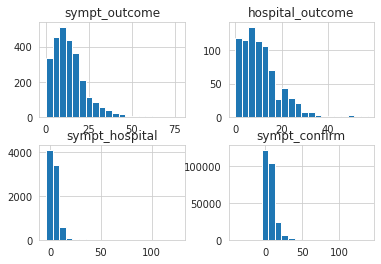

In [184]:
(df_up_dates_3[['sympt_outcome', 'hospital_outcome', 'sympt_hospital', 'sympt_confirm']]).hist(bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sympt_outcome'>

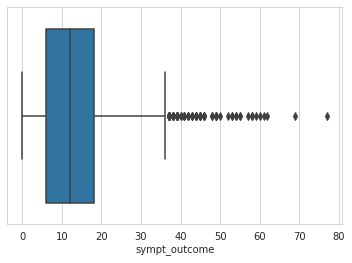

In [185]:
sns.boxplot(df_up_dates_3['sympt_outcome'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_outcome'>

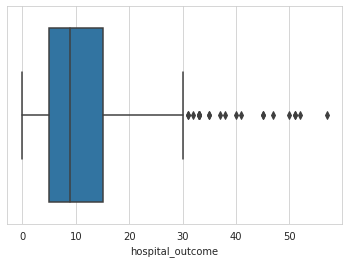

In [186]:
sns.boxplot(df_up_dates_3['hospital_outcome'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sympt_hospital'>

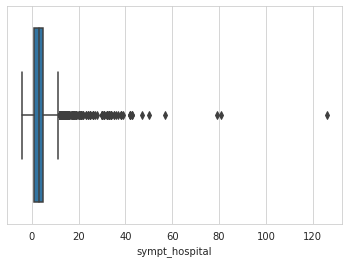

In [187]:
sns.boxplot(df_up_dates_3['sympt_hospital'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sympt_confirm'>

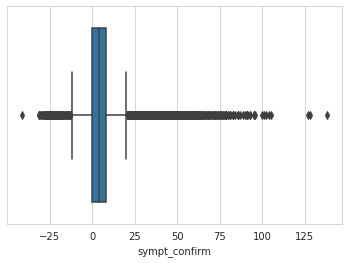

In [188]:
sns.boxplot(df_up_dates_3['sympt_confirm'])

Можно объяснить выбросы в первых трех графиках:
- от начала симптомов до какого-то исхода может пройти любое время - человек может лежать в реанимации и тд
- от начала госпитализации до исхода все точно также, как выше
- время от начала первых симптомов до госпитализации отрицательны:
 - скорее всего человек был госпитализирован изначально по другой причине
- очень много времени между симптомами и госпитализацией:
 - это объяснить сложнее: есть вероятность, что человеку не помогало лечение на дому, и госпитализировали его позднее. Также у человека могли быть осложнения. С учетом того, что коронавирус в среднем длится до 14 дней, рассмотрим случаи, когда людей госпитализировали спустя месяц после начала симтомов

- в четвертом сделать это достаточно сложно, особенно случаи, когда между началом симптома и подтверждением коронавируса проходит более месяца. Также надо рассмотреть случаи, когда подтверждение было, но симптомы проявились спустя более чем 14 дней - это тоже довольно странно.

**Итого**
1. Рассмотреть случаи, когда людей госпитализировали спустя месяц после начала симтомов
2. Рассмотреть случаи, когда между началом симптома и подтверждением коронавируса проходит более месяца
3. Рассмотреть случаи, когда подтверждение было, но симптомы проявились спустя более чем 14 дней

### Cмотрим людей, которых госпитализировали спустя месяц после начала симтомов

In [189]:
# таких всего 38 человек
df_up_dates_3.query('sympt_hospital > 30').shape

(38, 24)

In [190]:
# посмотрим на топ 10
df_up_dates_3.query('sympt_hospital > 30').sort_values('sympt_hospital', ascending=False).head(10)

,ID,sex,city,province,country,latitude,longitude,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
2489924,009-61960,female,Lanus,Buenos Aires,Argentina,-34.699960,-58.383860,NaN,NaN,False,no,45.0,35-55,NaT,2020-01-26,2020-05-31,2020-06-01,NaN,NaN,NaN,NaN,NaN,126.0,127.0
2481764,009-54616,male,COMUNA 2,CABA,Argentina,-34.610859,-58.486392,NaN,NaN,False,no,71.0,55-75,NaT,2020-03-01,2020-05-21,2020-05-21,NaN,NaN,NaN,NaN,NaN,81.0,81.0
2487779,009-60029,male,Pilar,Buenos Aires,Argentina,-34.459330,-58.915290,NaN,NaN,False,no,73.0,55-75,NaT,2020-03-10,2020-05-28,2020-05-30,NaN,NaN,NaN,NaN,NaN,79.0,81.0
2481166,009-54078,male,Tigre,Buenos Aires,Argentina,-34.425770,-58.586280,NaN,NaN,False,no,38.0,35-55,NaT,2020-03-23,2020-05-19,2020-05-19,NaN,NaN,NaN,NaN,NaN,57.0,57.0
2472983,009-46713,female,La Plata,Buenos Aires,Argentina,-34.913930,-57.946360,NaN,NaN,False,no,35.0,18-35,NaT,2020-04-16,2020-06-05,2020-06-04,NaN,NaN,NaN,NaN,NaN,50.0,49.0
2478862,009-52003,female,Moron,Buenos Aires,Argentina,-34.646050,-58.618000,NaN,NaN,False,no,71.0,55-75,NaT,2020-04-01,2020-05-18,2020-05-17,NaN,NaN,NaN,NaN,NaN,47.0,46.0
2473744,009-47399,female,Capital,La Rioja,Argentina,-34.633239,-58.406066,NaN,NaN,False,no,45.0,35-55,NaT,2020-03-12,2020-04-24,2020-04-24,NaN,NaN,NaN,NaN,NaN,43.0,43.0
2471381,009-45271,female,Los Lagos,Neuquen,Argentina,-40.758337,-71.481932,NaN,NaN,False,no,5.0,4-12,NaT,2020-04-01,2020-05-14,2020-04-04,NaN,NaN,NaN,NaN,NaN,43.0,3.0
2475996,009-49425,male,COMUNA 9,CABA,Argentina,-34.610859,-58.486392,NaN,NaN,False,no,57.0,55-75,NaT,2020-03-25,2020-05-06,2020-05-07,NaN,NaN,NaN,NaN,NaN,42.0,43.0
365493,002-321,male,Hong Kong,Hong Kong,China,22.380740,114.132400,India,NaN,False,yes,76.0,75-90,NaT,2020-01-23,2020-03-05,2020-03-07,NaN,diarrhea,[diarrhea],NaN,NaN,42.0,44.0


В глаза бросается, что 9 из 10 случаев из Аргентины. Посмотрим на сырые данные этих пациентов

In [191]:
first_list = df_up_dates_3.query('sympt_hospital > 30').sort_values('sympt_hospital', ascending=False).head(10)['ID'].to_list()

In [192]:
df.query('ID in @first_list')

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
365493,002-321,76.0,male,Hong Kong,Hong Kong,China,22.380740,114.132400,admin1,23.01.2020,05.03.2020,07.03.2020,diarrhea,no,NaN,India,NaN,Indian Tours,False,NaN,https://www.info.gov.hk/gia/general/202003/08/P2020030800776.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hong Kong,China,4250.0,NaN,True
2471381,009-45271,5.0,female,Los Lagos,Neuquen,Argentina,-40.758337,-71.481932,point,01.04.2020,14.05.2020,04.04.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15999.0,NaN,False
2472983,009-46713,35.0,female,La Plata,Buenos Aires,Argentina,-34.913930,-57.946360,point,16.04.2020,05.06.2020,04.06.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15883.0,NaN,False
2473744,009-47399,45.0,female,Capital,La Rioja,Argentina,-34.633239,-58.406066,point,12.03.2020,24.04.2020,24.04.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15971.0,NaN,False
2475996,009-49425,57.0,male,COMUNA 9,CABA,Argentina,-34.610859,-58.486392,point,25.03.2020,06.05.2020,07.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15924.0,NaN,False
2478862,009-52003,71.0,female,Moron,Buenos Aires,Argentina,-34.646050,-58.618000,point,01.04.2020,18.05.2020,17.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15913.0,NaN,False
2481166,009-54078,38.0,male,Tigre,Buenos Aires,Argentina,-34.425770,-58.586280,point,23.03.2020,19.05.2020,19.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15880.0,NaN,False
2481764,009-54616,71.0,male,COMUNA 2,CABA,Argentina,-34.610859,-58.486392,point,01.03.2020,21.05.2020,21.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15852.0,NaN,False
2487779,009-60029,73.0,male,Pilar,Buenos Aires,Argentina,-34.459330,-58.915290,point,10.03.2020,28.05.2020,30.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15895.0,NaN,False
2489924,009-61960,45.0,female,Lanus,Buenos Aires,Argentina,-34.699960,-58.383860,point,26.01.2020,31.05.2020,01.06.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15872.0,NaN,False


Никаких симптомов, никакой дополнительной информации кроме неработующей ссылки нет. Все же я понимаю, что могут быть осложнения. При чем можно заметить 1 факт: подтверждение диагноза с момента симптомов примерное такое же, то есть все эти 2 - 4 месяца люди непонятно как лечились, выживали. Мне кажется это весьма сомнительным, поэтому предлагаю задать планку между симптомами до больницы в 40 дней. Конечно, возможно сами симптомы ковида были так давно, потому что они похожи на простуду: человек мог сначала заболеть простудой, потом короноавирусом. Возможно тесты были плохие, но вероятность всего этого достаточно мала

In [193]:
first_list_40 = df_up_dates_3.query('sympt_hospital > 40').sort_values('sympt_hospital', ascending=False).head(10)['ID'].to_list()

In [194]:
len(first_list_40)

10

In [195]:
df_up_dates_3 = df_up_dates_3.query('ID not in @first_list_40')

### Смотрим те случаи, когда между началом симптомов и подтверждением коронавируса проходит более месяца

In [196]:
# таких заметно больше еще потому, что данных подтверждения больше всего
df_up_dates_3.query('sympt_confirm > 30').shape

(2881, 24)

In [197]:
df_up_dates_3.query('sympt_confirm > 30').sort_values('sympt_confirm', ascending=False).head(20)

,ID,sex,city,province,country,latitude,longitude,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
131519,002-110421,male,NaN,NaN,Philippines,11.81613,122.84840,NaN,NaN,False,no,29.0,18-35,NaT,2020-01-17,NaT,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN,138.0
2474206,009-47814,male,Malvinas Argentinas,Buenos Aires,Argentina,-34.49707,-58.70306,NaN,NaN,False,no,78.0,75-90,NaT,2020-01-02,NaT,2020-05-09,NaN,NaN,NaN,NaN,NaN,NaN,128.0
1235155,007-43644,male,Olpe,Nordrhein-Westfalen,Germany,51.02886,7.84698,NaN,NaN,False,no,47.0,35-55,NaT,2020-01-06,NaT,2020-04-20,NaN,NaN,NaN,NaN,NaN,NaN,105.0
935829,007-167045,male,Regensburg,Bayern,Germany,49.01492,12.10173,NaN,NaN,False,no,9.5,4-12,NaT,2020-01-31,NaT,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,104.0
126017,002-105470,male,Bocaue,Bulacan,Philippines,14.78787,120.93156,NaN,NaN,False,no,48.0,35-55,NaT,2020-02-13,NaT,2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,102.0
122885,002-102651,male,San Juan,Metro Manila,Philippines,14.60000,121.03000,NaN,NaN,False,no,40.0,35-55,NaT,2020-02-02,NaT,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,101.0
2488948,009-61081,female,Merlo,Buenos Aires,Argentina,-34.66257,-58.72710,NaN,NaN,False,no,29.0,18-35,NaT,2020-02-22,NaT,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2492177,009-63989,female,Lomas de Zamora,Buenos Aires,Argentina,-34.75578,-58.39180,NaN,NaN,False,no,40.0,35-55,NaT,2020-03-02,NaT,2020-06-06,NaN,NaN,NaN,NaN,NaN,NaN,96.0
125722,002-105204,male,Balagtas Bigaa,Bulacan,Philippines,14.81635,120.90938,NaN,NaN,False,no,48.0,35-55,NaT,2020-02-19,NaT,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,95.0
935876,007-167088,female,Regensburg,Bayern,Germany,49.01492,12.10173,NaN,NaN,False,no,24.5,18-35,NaT,2020-02-16,NaT,2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN,95.0


In [198]:
# смотрим снова на сырые данные
second_list = df_up_dates_3.query('sympt_confirm > 30').head(20)['ID'].to_list()

In [199]:
df.query('ID in @second_list').head(8)

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
8500,000-1-17649,70-79,male,Toorak,Victoria,Australia,-37.841000,145.018000,point,27.01.2020,NaN,06.03.2020,NaN,NaN,29.02.2020,"Colorado, United States; Los Angeles, California, United States",NaN,VA Case 11; Doctor who treated many patients from 02.03.2020 to 06.03.2020; traveled to Colorado via Los Angeles,False,NaN,https://www2.health.vic.gov.au/about/media-centre/MediaReleases/eleventh-case-coronavirus-victoria,NaN,NaN,NaN,NaN,Toorak,NaN,NaN,Victoria,Australia,8711.0,NaN,NaN
8503,000-1-17651,30-39,female,NaN,Victoria,Australia,-36.871600,144.315600,admin1,27.01.2020,29.02.2020,01.03.2020,NaN,NaN,28.02.2020,"Tehran, Iran",NaN,VA Case 9,False,NaN,https://www2.health.vic.gov.au/about/media-centre/MediaReleases/ninth-covid-19-case-victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,Australia,908.0,NaN,NaN
11082,000-1-19973,51,male,NaN,NaN,Singapore,1.353460,103.815100,admin0,04.02.2020,NaN,08.03.2020,NaN,NaN,NaN,NaN,NaN,Case 151; linked to Case 66 and Case 91; serological detection - had recovered well before date of confirmation,False,NaN,https://www.moh.gov.sg/news-highlights/details/three-more-cases-discharged-ten-new-cases-of-covid-19-infection-confirmed,NaN,discharge,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
11322,000-1-20188,40-49,male,Eun-dong,Sejong,South Korea,36.487002,127.282234,point,03.02.2020,NaN,12.03.2020,NaN,NaN,NaN,NaN,NaN,Sejong Case 28; self-contained,False,NaN,https://www.sejong.go.kr/bbs/R3340/list.do,NaN,NaN,NaN,NaN,Eun-dong,NaN,Yeongi,Sejong,South Korea,3185.0,NaN,NaN
119958,002-100016,38,female,Quezon,Metro Manila,Philippines,14.630000,121.030000,admin2,28.03.2020,NaN,02.05.2020,NaN,NaN,NaN,NaN,NaN,C143412,False,NaN,PH Data Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7375.0,NaN,False
119986,002-100041,77,male,Las Pinas,Metro Manila,Philippines,14.450000,120.980000,admin2,20.03.2020,NaN,02.05.2020,NaN,NaN,NaN,NaN,NaN,C283731,False,NaN,PH Data Drop,NaN,recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5281.0,NaN,False
120058,002-100106,73,male,Las Pinas,Metro Manila,Philippines,14.450000,120.980000,admin2,01.04.2020,NaN,02.05.2020,NaN,NaN,NaN,NaN,NaN,C643359,False,NaN,PH Data Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5281.0,NaN,False
120061,002-100109,27,male,Las Pinas,Metro Manila,Philippines,14.450000,120.980000,admin2,17.03.2020,NaN,02.05.2020,NaN,NaN,NaN,NaN,NaN,C697247,False,NaN,PH Data Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5281.0,NaN,False


В доп. инофрмации есть случай, когда больной выздоравливал до проверки теста, но тест показывал, что пациент переболел ковидом. Возможно это был тест на антитела. В таком случае, если пациента не клали в больницу или же пациент выздоровел, то считать за выброс данные объекты я бы не стал, но и включать в выборку тоже. В таком случае нужно менять данные объекта, т.к. пациент выздоровел. Наоборот, если есть дата госпитализации, и времени с момента симптомов до госпитализации прошло немного, то это ошибка в данных

In [200]:
# отберем случаи, когда у людей была дата госпитализации или же есть не пустой статус
df_up_dates_3.query('sympt_confirm > 30 and (outcome == outcome or date_to_hospital == date_to_hospital)')['outcome'].value_counts()

recovered    108
dead         28 
Name: outcome, dtype: int64

108 человек выздоровели. Эти пациенты искажают статистку с одной стороны, с другой дают понять, что были случаи того, что человек переболел на ногах  выздоровел.

Рассмотрим случаи, когда дата госпитализации больше даты подтверждения диагноза, при этом между симптомами и тестом прошло более 30 дней. Скорее всего такие данные непригодны для исследования

In [444]:
df_up_dates_3.query('sympt_confirm > 30 and date_to_hospital > date_confirm').sort_values('sympt_confirm')

,ID,sex,city,province,country,latitude,longitude,travel_history_location,reported_market_exposure,chronic_disease_binary,was_in_Wuhan,age,age_range,date_of_outcome,date_of_symptoms,date_to_hospital,date_confirm,outcome,symptoms,symptoms_list,sympt_outcome,hospital_outcome,sympt_hospital,sympt_confirm
2476065,009-49488,male,COMUNA 1,CABA,Argentina,-34.610859,-58.486392,NaN,NaN,False,no,5.0,4-12,NaT,2020-04-05,2020-05-08,2020-05-07,NaN,NaN,NaN,NaN,NaN,33.0,32.0
2476057,009-49480,female,COMUNA 1,CABA,Argentina,-34.610859,-58.486392,NaN,NaN,False,no,24.0,18-35,NaT,2020-04-04,2020-05-08,2020-05-07,NaN,NaN,NaN,NaN,NaN,34.0,33.0


In [201]:
df.query('ID == "009-49488" or ID == "009-49480"')

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
2476057,009-49480,24.0,female,COMUNA 1,CABA,Argentina,-34.610859,-58.486392,point,04.04.2020,08.05.2020,07.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15839.0,NaN,False
2476065,009-49488,5.0,male,COMUNA 1,CABA,Argentina,-34.610859,-58.486392,point,05.04.2020,08.05.2020,07.05.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,15839.0,NaN,False


Оказывается таких человек всего двое, при этом разница между диагнозом и симптомами пограничная, так что можно оставить

### Смотрим случаи, когда подтверждение было, но симптомы проявились спустя более чем 14 дней

In [206]:
third_list = df_up_dates_3.query('sympt_confirm < -14').sort_values('sympt_confirm').head(10)['ID'].to_list()

In [207]:
df.query('ID in @third_list')

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
456662,002-94131,28,male,Manila,Metro Manila,Philippines,14.595800,120.977200,admin2,14.05.2020,NaN,03.04.2020,NaN,NaN,NaN,NaN,NaN,C734080,False,NaN,PH Data Drop,NaN,recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5914.0,NaN,False
460414,002-97509,16,male,Antipolo,Rizal,Philippines,14.584244,121.176289,admin2,20.05.2020,NaN,20.04.2020,NaN,NaN,NaN,NaN,NaN,C152146,False,NaN,PH Data Drop,NaN,NaN,NaN,NaN,NaN,NaN,Antipolo,Rizal,Philippines,1167.0,NaN,False
876606,007-113744,35-59,male,Saarlouis,Saarland,Germany,49.355470,6.775600,admin2,30.04.2020,NaN,31.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saarlouis,Saarland,Germany,7657.0,NaN,False
888008,007-124005,15-34,male,Zwickau,Sachsen,Germany,50.714740,12.497550,point,24.04.2020,NaN,25.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11603.0,NaN,False
1646643,007-80678,35-59,female,Ravensburg,Baden-Wurttemberg,Germany,47.781980,9.614620,point,27.04.2020,NaN,27.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11844.0,NaN,False
1677821,007-83484,35-59,female,Munchen,Bayern,Germany,48.136410,11.577540,point,30.04.2020,NaN,31.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11847.0,NaN,False
1681932,007-83854,60-79,male,Munchen,Bayern,Germany,48.136410,11.577540,point,28.04.2020,NaN,29.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11847.0,NaN,False
1840732,007-98146,15-34,female,Cham,Bayern,Germany,49.237066,12.695773,point,26.04.2020,NaN,27.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11881.0,NaN,False
1840754,007-98148,15-34,female,Cham,Bayern,Germany,49.237066,12.695773,point,28.04.2020,NaN,28.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11881.0,NaN,False
1842265,007-98284,35-59,female,Cham,Bayern,Germany,49.237066,12.695773,point,27.04.2020,NaN,27.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,11881.0,NaN,False


Большинство таких пациентов из Германии. Мне сложно объяснить, почему такая разница в данных. С учетом того, что инкубационный период составляет 2 недели, то в таком случае достаточно странно видеть симптомы на 30 день и больше. Есть два варианта подобного:
- тест изначально был ложноположительным
- пациенты обратились за помощью из-за последствий после перенесенной инфекции

Я предлагаю не включать в список тех, у кого симпотмы появились после 21 дня.

In [208]:
third_list_2 = df_up_dates_3.query('sympt_confirm < -21').sort_values('sympt_confirm').head(10)['ID'].to_list()

In [209]:
df_up_dates_3 = df_up_dates_3.query('ID not in @third_list_2')

In [211]:
df_for_tableau = df_up_dates_3

In [212]:
df_for_tableau.to_csv('covid_tableau.csv')